In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime 

In [2]:
wind = pd.read_csv(r'C:\Users\Gabe\Desktop\Python\Springboard\LMP\pepco_df_wind.csv')
solar = pd.read_csv(r'C:\Users\Gabe\Desktop\Python\Springboard\LMP\pepco_df_solar.csv')

In [5]:
wind = wind.set_index('datetime')
wind.index = pd.to_datetime(wind.index)

#wind.index

solar = solar.set_index('datetime')
solar.index = pd.to_datetime(solar.index)

#solar.index

In [73]:
print(len(solar))
print(len(wind))

467208
467208


## Resmaple of our datasets to gte hourly averages and medians across all voltage and generation types.

In [7]:
mean_hourly_solar = solar.resample('H').mean()
mean_hourly_wind = wind.resample('H').mean()

median_hourly_solar = solar.resample('H').median()
median_hourly_wind = wind.resample('H').median()

### Remove kv from value of voltage column and add kv to the column name.
### Additionally we change kv from object to float, and drop other, immaterial columns.

In [10]:
wind['voltage'] = wind['voltage'].str.replace(r'[^0-9]+', '')
wind = wind.rename(columns={"voltage":'voltage_kv'})
wind.voltage_kv = wind.voltage_kv.astype(float)
wind = wind.drop(['area', 'zone'], axis=1)

solar['voltage'] = solar['voltage'].str.replace(r'[^0-9]+', '')
solar = solar.rename(columns={"voltage":'voltage_kv'})
solar.voltage_kv = solar.voltage_kv.astype(float)
solar = solar.drop(['area', 'zone'], axis=1)

In [53]:

[69     
13     
138    
34      
18      
230     
500     
20      
24      
23      
4       
19      
345] 

<bound method IndexOpsMixin.nunique of datetime
2020-07-01     34
2020-07-01     34
2020-07-01     34
2020-07-01     34
2020-07-01     69
             ... 
2020-09-30    345
2020-09-30     69
2020-09-30     69
2020-09-30     69
2020-09-30     69
Name: voltage_kv, Length: 467208, dtype: object>

### Here we are going create a new df that will average our measurements by mean (we may possibly do by median so as to not be effected by outliers).

### Then we rae going to filter the new multi-level index to get separate dataframes for each voltage amount. These dataframes will be used in linear regression and other models later on.

In [25]:
solar_reset = solar.reset_index()
#solar_reset = solar.groupby('voltage_kv').mean()
solar_reset = solar_reset.groupby(['voltage_kv', pd.Grouper(key='datetime', freq='H')]).mean()

wind_reset = wind.reset_index()
#wind_reset = wind.groupby('voltage_kv').mean()
wind_reset = wind_reset.groupby(['voltage_kv', pd.Grouper(key='datetime', freq='H')]).mean()

In [37]:
voltage_69 = solar_reset.iloc[solar_reset.index.get_level_values('voltage_kv') == 69.0]
voltage_13 = solar_reset.iloc[solar_reset.index.get_level_values('voltage_kv') == 13.0]
voltage_138 = solar_reset.iloc[solar_reset.index.get_level_values('voltage_kv') == 138.0]
voltage_34 = solar_reset.iloc[solar_reset.index.get_level_values('voltage_kv') == 34.0]
voltage_18 = solar_reset.iloc[solar_reset.index.get_level_values('voltage_kv') == 18.0]
voltage_230 = solar_reset.iloc[solar_reset.index.get_level_values('voltage_kv') == 230.0]
voltage_500 = solar_reset.iloc[solar_reset.index.get_level_values('voltage_kv') == 500.0]
voltage_20 = solar_reset.iloc[solar_reset.index.get_level_values('voltage_kv') == 20.0]
voltage_24 = solar_reset.iloc[solar_reset.index.get_level_values('voltage_kv') == 24.0]
voltage_23 = solar_reset.iloc[solar_reset.index.get_level_values('voltage_kv') == 23.0]
voltage_4 = solar_reset.iloc[solar_reset.index.get_level_values('voltage_kv') == 4.0]
voltage_19 = solar_reset.iloc[solar_reset.index.get_level_values('voltage_kv') == 19.0]
voltage_345 = solar_reset.iloc[solar_reset.index.get_level_values('voltage_kv') == 345.0]

In [128]:
voltage_69.head()

pnode_id  system_energy_price_rt  \
voltage_kv datetime                                                    
69.0       2020-07-01 00:00:00  6.628111e+08                   15.65   
           2020-07-01 01:00:00  6.628111e+08                   15.24   
           2020-07-01 02:00:00  6.628111e+08                   14.43   
           2020-07-01 03:00:00  6.628111e+08                   13.66   
           2020-07-01 04:00:00  6.628111e+08                   13.44   

                                total_lmp_rt  congestion_price_rt  \
voltage_kv datetime                                                 
69.0       2020-07-01 00:00:00     15.665059                 0.00   
           2020-07-01 01:00:00     15.266471                 0.00   
           2020-07-01 02:00:00     14.490588                 0.03   
           2020-07-01 03:00:00     13.695412                 0.00   
           2020-07-01 04:00:00     13.473176                 0.00   

                                marginal_loss_price_rt  row_is_current  \
voltage_kv datetime                                                      
69.0       2020-07-01 00:00:00                0.011647             1.0   
           2020-07-01 01:00:00                0.026235             1.0   
           2020-07-01 02:00:00                0.031529             1.0   
           2020-07-01 03:00:00                0.031882             1.0   
           2020-07-01 04:00:00                0.032000             1.0   

                                version_nbr  solar_generation_mw    mw  \
voltage_kv datetime                                                      
69.0       2020-07-01 00:00:00          1.0               -1.153  21.9   
           2020-07-01 01:00:00          1.0               -1.157  21.9   
           2020-07-01 02:00:00          1.0               -1.190  21.9   
           2020-07-01 03:00:00          1.0               -1.172  21.9   
           2020-07-01 04:00:00          1.0               -1.180  21.9   

                                fuel_percentage_of_total  is_renewable  
voltage_kv datetime                                                     
69.0       2020-07-01 00:00:00                       0.0           1.0  
           2020-07-01 01:00:00                       0.0           1.0  
           2020-07-01 02:00:00                       0.0           1.0  
           2020-07-01 03:00:00                       0.0           1.0  
           2020-07-01 04:00:00                       0.0           1.0

### Perhaps the saame needs to be done with gen type

## Exploring the Data

In [39]:
solar['voltage_kv'].value_counts(normalize=True) * 100

69.0     39.351852
13.0     20.370370
138.0    19.444444
34.0      7.407407
18.0      4.166667
230.0     2.777778
500.0     1.851852
24.0      0.925926
23.0      0.925926
20.0      0.925926
4.0       0.925926
345.0     0.462963
19.0      0.462963
Name: voltage_kv, dtype: float64

C:\Users\Gabe\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


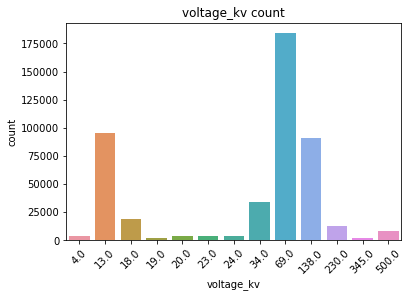

In [40]:
sns.countplot(solar.voltage_kv)
plt.title('voltage_kv count')
plt.xticks(rotation=45)
plt.show()

In [41]:
wind['voltage_kv'].value_counts(normalize=True) * 100

69.0     39.351852
13.0     20.370370
138.0    19.444444
34.0      7.407407
18.0      4.166667
230.0     2.777778
500.0     1.851852
24.0      0.925926
23.0      0.925926
20.0      0.925926
4.0       0.925926
345.0     0.462963
19.0      0.462963
Name: voltage_kv, dtype: float64

C:\Users\Gabe\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


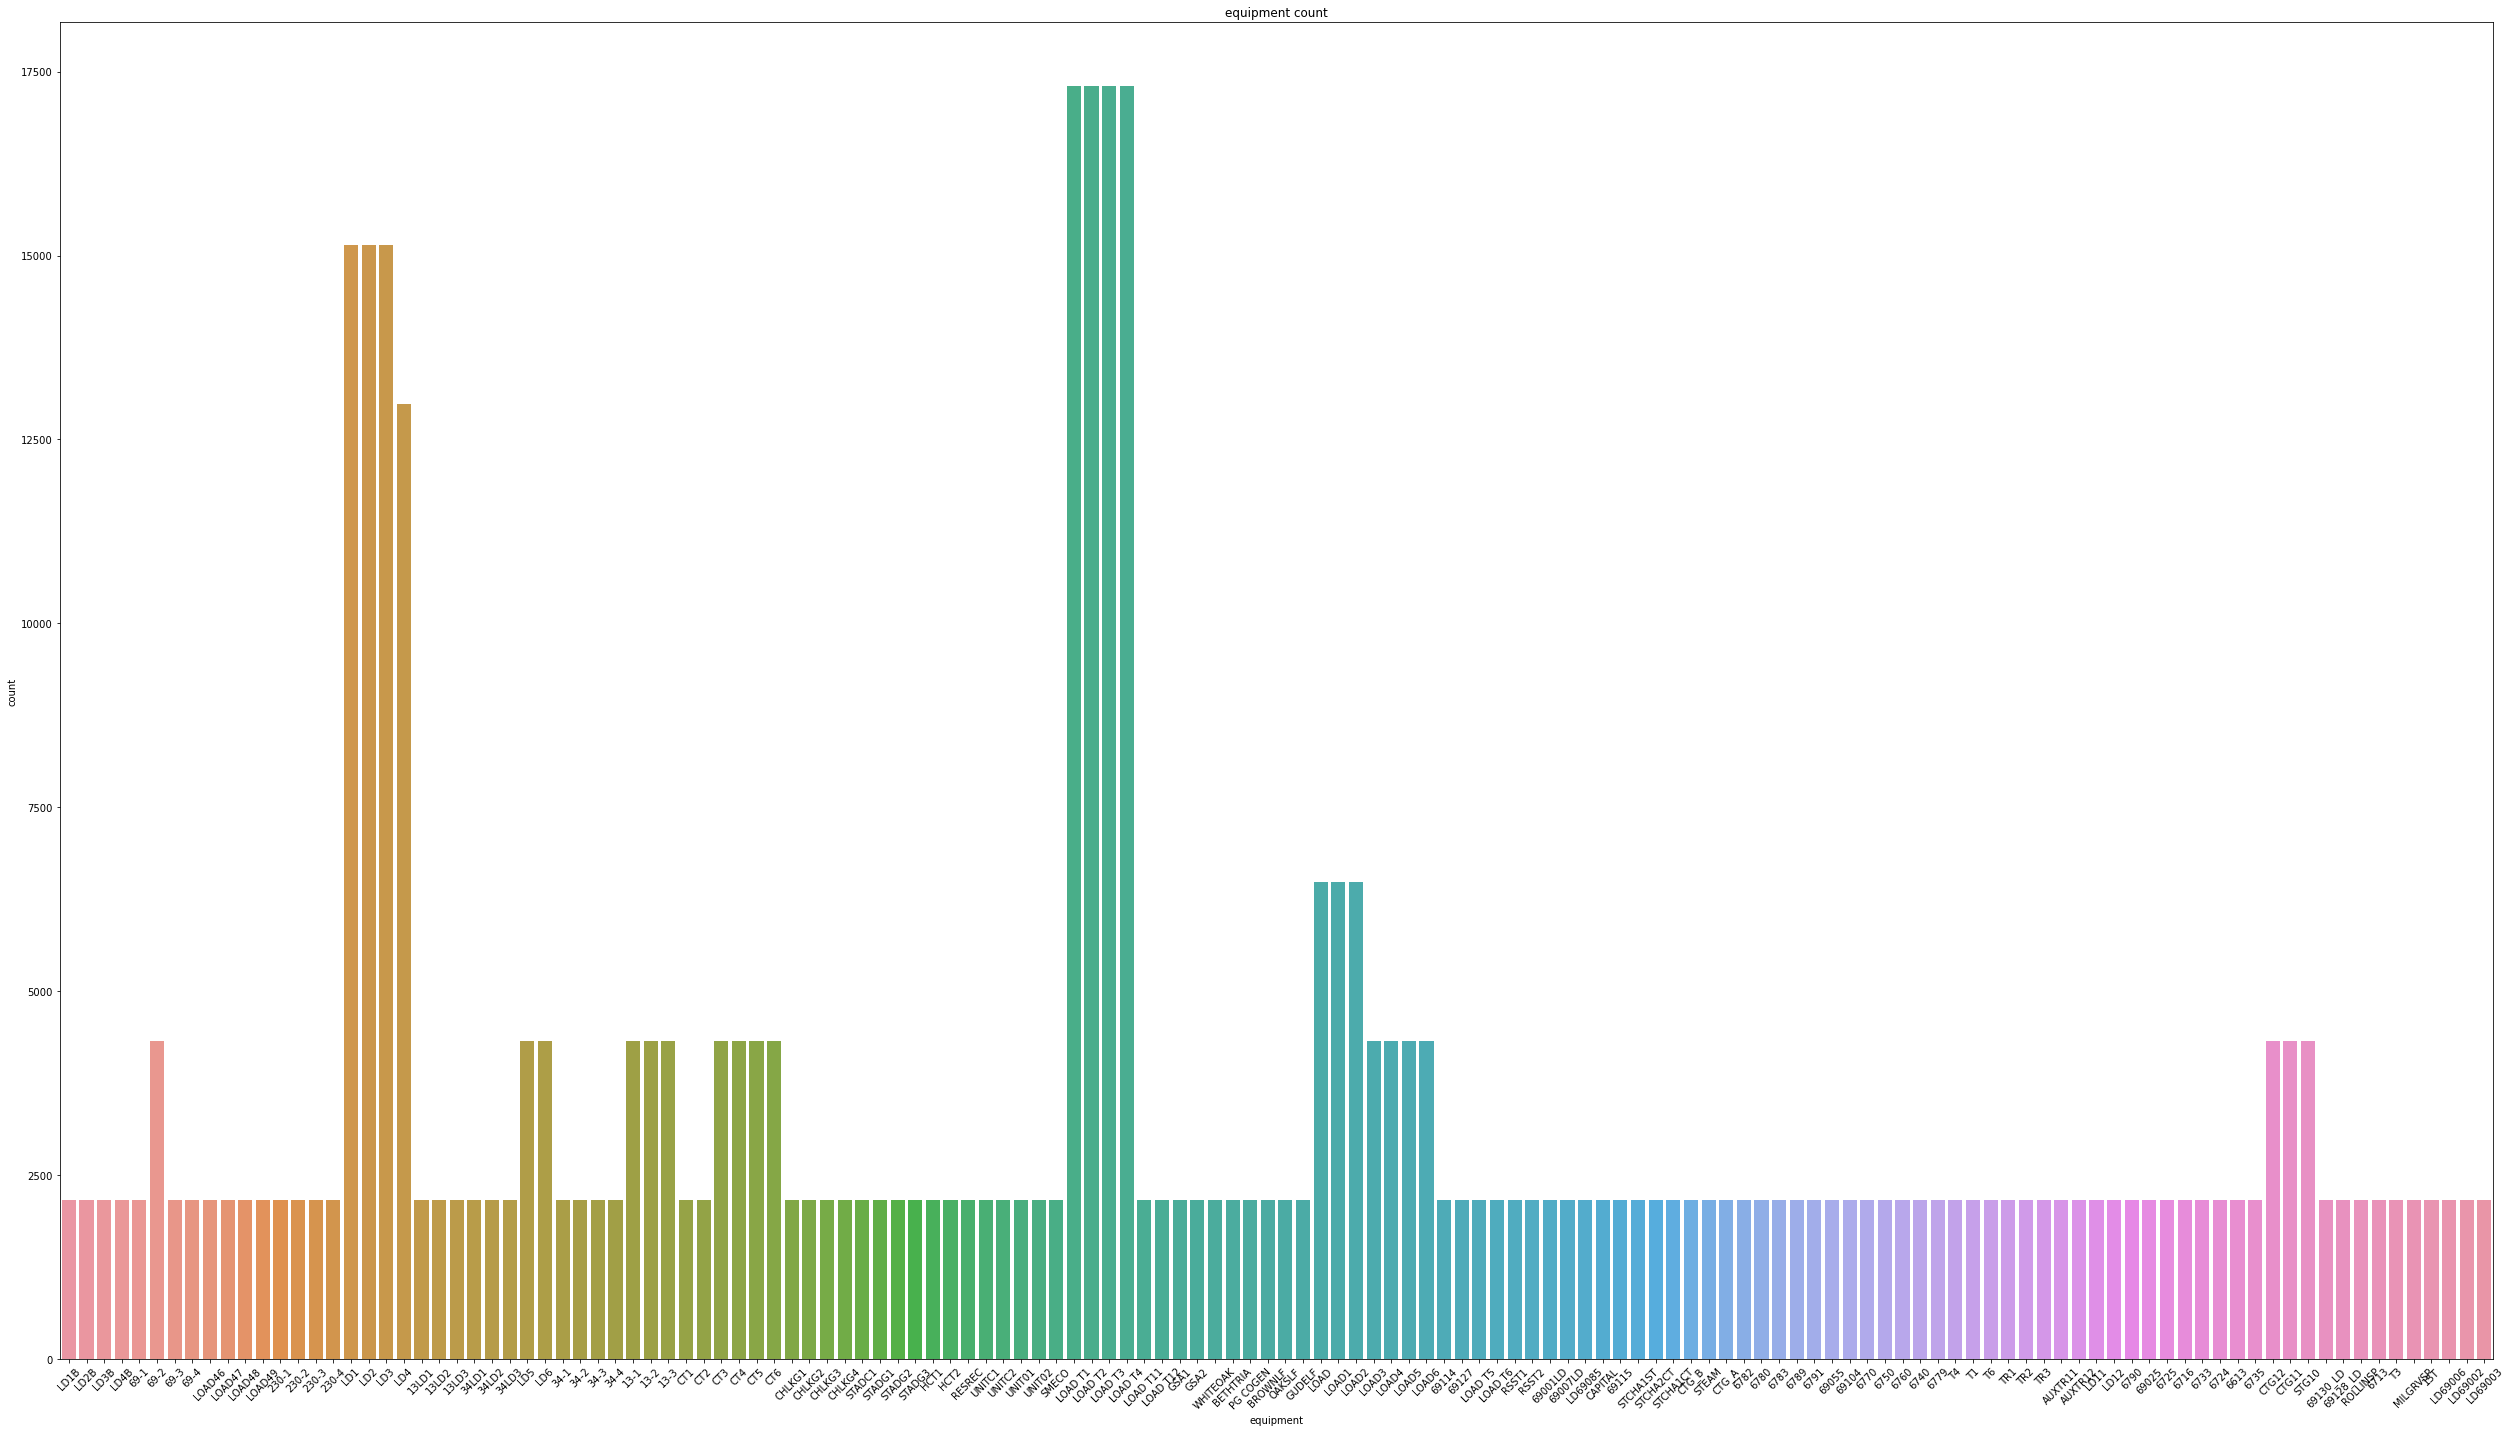

In [42]:

plt.figure(figsize=(35,20))


sns.countplot(solar.equipment)
plt.title('equipment count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Way too many equipment types to clearly see on bar plot, but clearly there are spikes. This info may be usefule when doing feature engineering.

In [43]:
wind['equipment'].value_counts(normalize=True) * 100
#Wayne: i figure i'm not getting an innacurate percentage becuase in theory each 
#piece of eqipment 

LOAD T4     3.773585
LOAD T1     3.773585
LOAD T2     3.773585
LOAD T3     3.773585
LD1         3.301887
              ...   
6783        0.471698
TR1         0.471698
AUXTR12     0.471698
69128_LD    0.471698
LOAD T11    0.471698
Name: equipment, Length: 138, dtype: float64

In [74]:
solar['equipment'].value_counts(normalize=True) * 100
#there are lots of different equipments here, how to determine approach in feature engineering?



In [44]:
#total_lmp_rt = solar.groupby('voltage_kv').mean()[['total_lmp_rt']]
#total_lmp_rt = total_lmp_rt.sort_values(by='total_lmp_rt', ascending=True)
total_lmp_rt['% of voltage out 100'] = solar['voltage_kv'].value_counts(normalize=True) * 100

In [80]:
total_lmp_rt

,total_lmp_rt,% of voltage
voltage_kv,,
19,23.710656,0.462963
500,23.732982,1.851852
18,24.120499,4.166667
4,24.263606,0.925926
23,24.508791,0.925926
345,24.541572,0.462963
13,24.558139,20.370370
69,24.616284,39.351852
138,24.685597,19.444444


### Interestingly the voltage of the nodes that make up abiut 80% of the grid are smack dab in the middle of total_lmp_rt.

In [45]:
from scipy.stats import norm
from scipy.stats import t
import numpy as np
import pandas as pd
from numpy.random import seed
import matplotlib.pyplot as plt
import random 

## Subset all floats into a dataframe

In [47]:
## not sure what i was doing here?

solar_std = solar[['system_energy_price_rt', 'total_lmp_rt', 'congestion_price_rt', 'marginal_loss_price_rt', 'solar_generation_mw',
'mw','fuel_percentage_of_total']] #need double brackets bc otherwise python reads as one column, need list of columns
solar_columns = ['system_energy_price_rt', 'total_lmp_rt', 'congestion_price_rt', 'marginal_loss_price_rt', 'solar_generation_mw',
'mw','fuel_percentage_of_total']

wind_std = wind[['system_energy_price_rt', 'total_lmp_rt', 'congestion_price_rt', 'marginal_loss_price_rt', 'wind_generation_mw',
'mw','fuel_percentage_of_total']] #need double brackets bc otherwise python reads as one column, need list of columns
wind_columns = ['system_energy_price_rt', 'total_lmp_rt', 'congestion_price_rt', 'marginal_loss_price_rt', 'wind_generation_mw',
'mw','fuel_percentage_of_total']

In [48]:

solar_std = solar_std.apply(pd.to_numeric)
wind_std = wind_std.apply(pd.to_numeric)

In [49]:
print(solar_std['total_lmp_rt'].std(ddof=0))
print(solar_std['total_lmp_rt'].mean())

17.976688410698962
24.585854052156204


### There are 216 unique pnodes

In [39]:
print(solar.voltage_kv.nunique())
print(solar.pnode_id.nunique())
print(solar.equipment.nunique())

13
216
138


In [50]:
solar.groupby('voltage_kv').count() / solar.pnode_id.nunique()

,pnode_id,pnode_name,equipment,type,system_energy_price_rt,total_lmp_rt,congestion_price_rt,marginal_loss_price_rt,row_is_current,version_nbr,solar_generation_mw,fuel_type,mw,fuel_percentage_of_total,is_renewable
voltage_kv,,,,,,,,,,,,,,,
4.0,20.027778,20.027778,20.027778,20.027778,20.027778,20.027778,20.027778,20.027778,20.027778,20.027778,20.027778,20.027778,20.027778,20.027778,20.027778
13.0,440.611111,440.611111,440.611111,440.611111,440.611111,440.611111,440.611111,440.611111,440.611111,440.611111,440.611111,440.611111,440.611111,440.611111,440.611111
18.0,90.125000,90.125000,90.125000,90.125000,90.125000,90.125000,90.125000,90.125000,90.125000,90.125000,90.125000,90.125000,90.125000,90.125000,90.125000
19.0,10.013889,10.013889,10.013889,10.013889,10.013889,10.013889,10.013889,10.013889,10.013889,10.013889,10.013889,10.013889,10.013889,10.013889,10.013889
20.0,20.027778,20.027778,20.027778,20.027778,20.027778,20.027778,20.027778,20.027778,20.027778,20.027778,20.027778,20.027778,20.027778,20.027778,20.027778
23.0,20.027778,20.027778,20.027778,20.027778,20.027778,20.027778,20.027778,20.027778,20.027778,20.027778,20.027778,20.027778,20.027778,20.027778,20.027778
24.0,20.027778,20.027778,20.027778,20.027778,20.027778,20.027778,20.027778,20.027778,20.027778,20.027778,20.027778,20.027778,20.027778,20.027778,20.027778
34.0,160.222222,160.222222,160.222222,160.222222,160.222222,160.222222,160.222222,160.222222,160.222222,160.222222,160.222222,160.222222,160.222222,160.222222,160.222222
69.0,851.180556,851.180556,851.180556,851.180556,851.180556,851.180556,851.180556,851.180556,851.180556,851.180556,851.180556,851.180556,851.180556,851.180556,851.180556


### Although there is not much differences in the lmp by voltage means, as you can see below their is a great difference in the standrd deviations.

In [51]:
print(solar.groupby('voltage_kv')['total_lmp_rt'].std(ddof=0).sort_values(ascending=True))
print(solar.groupby('voltage_kv')['total_lmp_rt'].mean().sort_values(ascending=True))

voltage_kv
500.0    15.578337
19.0     15.657216
138.0    17.056026
34.0     17.069822
18.0     17.238511
69.0     18.110163
13.0     18.429624
230.0    18.660552
345.0    18.808535
23.0     19.462245
4.0      19.781775
20.0     23.550356
24.0     23.557447
Name: total_lmp_rt, dtype: float64
voltage_kv
19.0     23.710656
500.0    23.732982
18.0     24.120499
4.0      24.263606
23.0     24.508791
345.0    24.541572
13.0     24.558139
69.0     24.616284
138.0    24.685597
34.0     24.686763
230.0    24.723689
20.0     24.907982
24.0     24.923710
Name: total_lmp_rt, dtype: float64


In [59]:
solar_lmp_std = solar.groupby('voltage_kv')['total_lmp_rt'].std(ddof=0).sort_values(ascending=True)
solar_lmp_mean = solar.groupby('voltage_kv')['total_lmp_rt'].mean().sort_values(ascending=True)

solar_lmp_std = solar_lmp_std.sort_index()
solar_lmp_mean = solar_lmp_mean.sort_index()



In [72]:
solar_lmp_std

voltage_kv
4.0      19.781775
13.0     18.429624
18.0     17.238511
19.0     15.657216
20.0     23.550356
23.0     19.462245
24.0     23.557447
34.0     17.069822
69.0     18.110163
138.0    17.056026
230.0    18.660552
345.0    18.808535
500.0    15.578337
Name: total_lmp_rt, dtype: float64

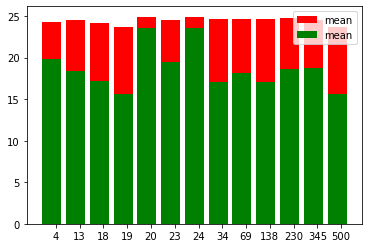

In [79]:
#https://stackoverflow.com/questions/10369681/how-to-plot-bar-graphs-with-same-x-coordinates-side-by-side-dodged
x_vlt =  [4, 13,18, 19, 20, 23, 24, 34, 69, 138, 230, 345, 500]
x_post = [i for i, _ in enumerate(x_vlt)]
N = len(solar_lmp_std)
width = 0.35
ind = np.arange(N)

plt.bar(x_post, solar_lmp_mean, color='red', label='mean')
plt.bar(x_post, solar_lmp_std, color='green', label='mean')

#N = len(solar_lmp_std)


plt.xticks(ind + width/2, (4, 13,18, 19, 20, 23, 24, 34, 69, 138, 230, 345, 500)) 
plt.legend(loc='best')
plt.show()

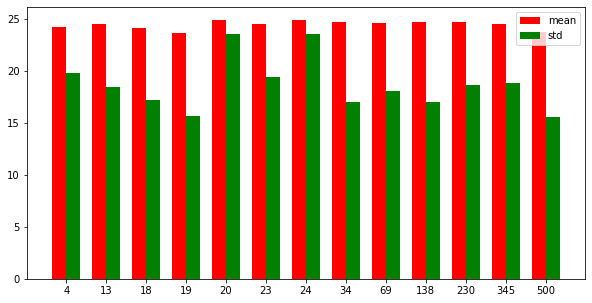

In [94]:
x_vlt =  [4, 13,18, 19, 20, 23, 24, 34, 69, 138, 230, 345, 500]
x_post = [i for i, _ in enumerate(x_vlt)]
N = len(solar_lmp_std) #number of pairs of bars we ant
width = 0.35
ind = np.arange(N) #position of bars on x-axis
plt.figure(figsize=(10,5))



plt.bar(ind, solar_lmp_mean, width, color='red', label='mean')
plt.bar(ind + width, solar_lmp_std, width, color='green', label='std')

#N = len(solar_lmp_std)


plt.xticks(ind + width/2, (4, 13,18, 19, 20, 23, 24, 34, 69, 138, 230, 345, 500)) 
plt.legend(loc='best')
plt.show()

### The marginal price loss clearly grows as the voltage grows. Meaining pnodes that have greater coltage clearly have higher marginal loss prices.

In [87]:
print(solar_std['marginal_loss_price_rt'].std(ddof=0))
print(solar_std['marginal_loss_price_rt'].mean())



0.4373033430097594
0.1657579921576687


In [88]:
print(solar.groupby('voltage_kv')['marginal_loss_price_rt'].std(ddof=0).sort_values())
print(solar.groupby('voltage_kv')['marginal_loss_price_rt'].mean().sort_values())

voltage_kv
500.0    0.287343
4.0      0.295017
24.0     0.331112
20.0     0.331739
19.0     0.336661
18.0     0.360278
345.0    0.364353
69.0     0.385254
230.0    0.401535
13.0     0.419866
23.0     0.445067
138.0    0.448208
34.0     0.449709
Name: marginal_loss_price_rt, dtype: float64
voltage_kv
19.0    -0.241859
23.0    -0.199196
18.0    -0.192534
20.0    -0.112744
345.0   -0.104424
24.0    -0.097016
500.0   -0.091585
4.0     -0.001493
13.0     0.065928
230.0    0.077678
69.0     0.157718
138.0    0.382820
34.0     0.388667
Name: marginal_loss_price_rt, dtype: float64


In [92]:
solar_mlp_std = solar.groupby('voltage_kv')['marginal_loss_price_rt'].std(ddof=0).sort_values()
solar_mlp_mean = solar.groupby('voltage_kv')['marginal_loss_price_rt'].mean().sort_values()


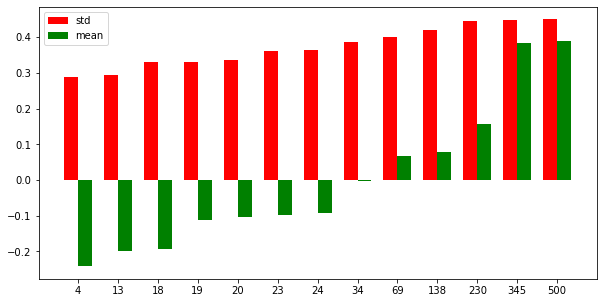

In [95]:
x_vlt =  [4, 13,18, 19, 20, 23, 24, 34, 69, 138, 230, 345, 500]
x_post = [i for i, _ in enumerate(x_vlt)]
N = len(solar_mlp_std) #number of pairs of bars we ant
width = 0.35
ind = np.arange(N) #position of bars on x-axis
plt.figure(figsize=(10,5))



plt.bar(ind, solar_mlp_std, width, color='red', label='std')
plt.bar(ind + width, solar_mlp_mean, width, color='green', label='mean')

#N = len(solar_lmp_std)


plt.xticks(ind + width/2, (4, 13,18, 19, 20, 23, 24, 34, 69, 138, 230, 345, 500)) 
plt.legend(loc='best')
plt.show()

In [18]:

(solar.groupby('voltage_kv')['marginal_loss_price_rt'].std(ddof=0)) - solar_std['marginal_loss_price_rt'].std(ddof=0)

voltage_kv
13    -0.017437
138    0.010905
18    -0.077025
19    -0.100642
20    -0.105565
23     0.007764
230   -0.035769
24    -0.106191
34     0.012406
345   -0.072950
4     -0.142286
500   -0.149960
69    -0.052049
Name: marginal_loss_price_rt, dtype: float64

In [120]:
marg_loss = solar['marginal_loss_price_rt']
marg_loss.head()

datetime
2020-07-01    0.12
2020-07-01    0.12
2020-07-01    0.12
2020-07-01    0.12
2020-07-01    0.10
Name: marginal_loss_price_rt, dtype: float64

### Charts


In [ ]:
for col in ['equipment']

In [135]:
hourly_solar = solar.resample('H').mean()
hourly_wind =wind.resample('H').mean()

In [99]:
thirteen_hourly_solar = solar.loc[solar['voltage_kv'] == 13.0].resample('H').mean()
onethreeeight_hourly_solar = solar.loc[solar['voltage_kv'] == 138.0].resample('H').mean()
eighteen_hourly_solar = solar.loc[solar['voltage_kv'] == 18.0].resample('H').mean()
nineteen_hourly_solar = solar.loc[solar['voltage_kv'] == 19.0].resample('H').mean()
twenty_hourly_solar = solar.loc[solar['voltage_kv'] == 20.0].resample('H').mean()
twentythree_hourly_solar = solar.loc[solar['voltage_kv'] == 23.0].resample('H').mean()
twothreezero_hourly_solar = solar.loc[solar['voltage_kv'] == 230.0].resample('H').mean()
twentyfour_hourly_solar = solar.loc[solar['voltage_kv'] == 24.0].resample('H').mean()
thirtyfour_hourly_solar = solar.loc[solar['voltage_kv'] == 34.0].resample('H').mean()
threefourfive_hourly_solar = solar.loc[solar['voltage_kv'] == 345.0].resample('H').mean()
four_hourly_solar = solar.loc[solar['voltage_kv'] == 4.0].resample('H').mean()
fivehundred_hourly_solar = solar.loc[solar['voltage_kv'] == 500.0].resample('H').mean()
sixnine_hourly_solar = solar.loc[solar['voltage_kv'] == 69.0].resample('H').mean()

In [104]:
thirteen_biwkly_solar_median = solar.loc[solar['voltage_kv'] == 13.0].resample('2W').median()
onethreeeight_biwkly_solar_median = solar.loc[solar['voltage_kv'] == 138.0].resample('2W').median()
eighteen_biwkly_solar_median = solar.loc[solar['voltage_kv'] == 18.0].resample('2W').median()
nineteen_biwkly_solar_median = solar.loc[solar['voltage_kv'] == 19.0].resample('2W').median()
twenty_biwkly_solar_median = solar.loc[solar['voltage_kv'] == 20.0].resample('2W').median()
twentythree_biwkly_solar_median = solar.loc[solar['voltage_kv'] == 23.00].resample('2W').median()
twothreezero_biwkly_solar_median = solar.loc[solar['voltage_kv'] == 230.0].resample('2W').median()
twentyfour_biwkly_solar_median = solar.loc[solar['voltage_kv'] == 24.0].resample('2W').median()
thirtyfour_biwkly_solar_median = solar.loc[solar['voltage_kv'] == 34.0].resample('2W').median()
threefourfive_biwkly_solar_median = solar.loc[solar['voltage_kv'] == 345.0].resample('2W').median()
four_biwkly_solar_median = solar.loc[solar['voltage_kv'] == 4.0].resample('2W').median()
fivehundred_biwkly_solar_median = solar.loc[solar['voltage_kv'] == 500.0].resample('2W').median()
sixnine_biwkly_solar_median = solar.loc[solar['voltage_kv'] == 69.0].resample('2W').median()

In [113]:
thirteen = thirteen_biwkly_solar_median.reset_index()
onethreeeight=onethreeeight_biwkly_solar_median.reset_index()
eighteen=eighteen_biwkly_solar_median.reset_index() 
nineteen=nineteen_biwkly_solar_median.reset_index() 
twenty=twenty_biwkly_solar_median.reset_index() 
twentythree=twentythree_biwkly_solar_median.reset_index() 
twothreezero=twothreezero_biwkly_solar_median.reset_index() 
twentyfour=twentyfour_biwkly_solar_median.reset_index() 
thirtyfour=thirtyfour_biwkly_solar_median.reset_index() 
threefourfive=threefourfive_biwkly_solar_median.reset_index() 
four=four_biwkly_solar_median.reset_index() 
fivehundred=fivehundred_biwkly_solar_median.reset_index() 
sixnine=sixnine_biwkly_solar_median.reset_index() 

### Clearly each kv's mlp reacts in a pattern

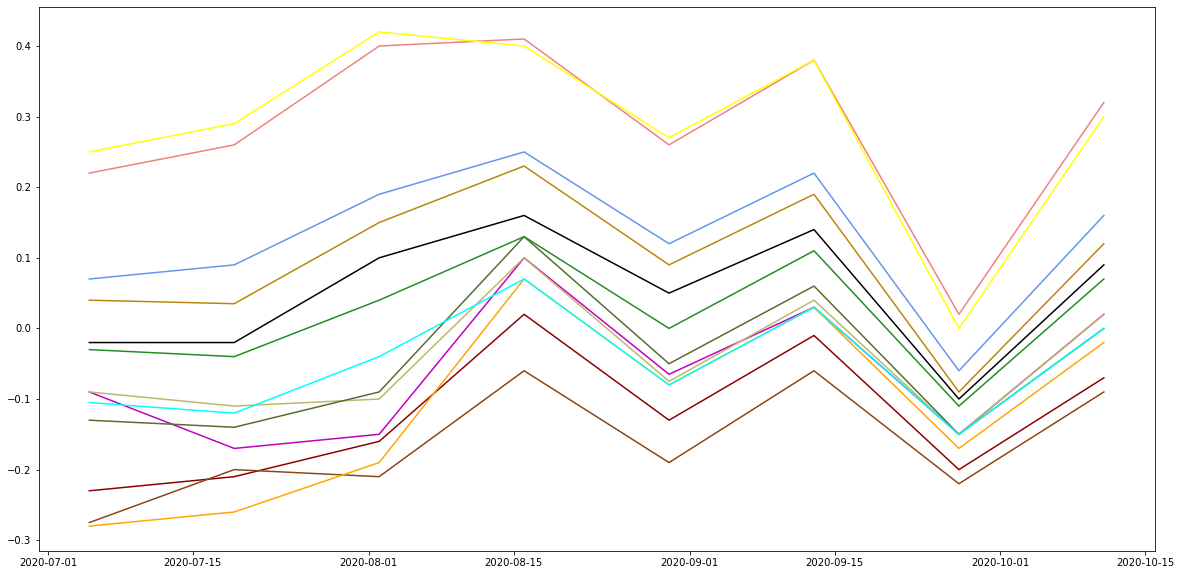

In [118]:
#ask how to annotate where each point starts 
plt.figure(figsize=(20,10))
plt.plot('datetime', 'marginal_loss_price_rt', data=thirteen, color='black')
plt.plot('datetime', 'marginal_loss_price_rt', data=onethreeeight, color='lightcoral')
plt.plot('datetime', 'marginal_loss_price_rt', data=eighteen, color='darkred')
plt.plot('datetime', 'marginal_loss_price_rt', data=nineteen, color='saddlebrown')
plt.plot('datetime', 'marginal_loss_price_rt', data=twenty, color='m')
plt.plot('datetime', 'marginal_loss_price_rt', data=twentythree, color='orange')
plt.plot('datetime', 'marginal_loss_price_rt', data=twothreezero, color='darkgoldenrod')
plt.plot('datetime', 'marginal_loss_price_rt', data=twentyfour, color='darkkhaki')
plt.plot('datetime', 'marginal_loss_price_rt', data=thirtyfour, color='yellow')
plt.plot('datetime', 'marginal_loss_price_rt', data=threefourfive, color='darkolivegreen')
plt.plot('datetime', 'marginal_loss_price_rt', data=four, color='forestgreen')
plt.plot('datetime', 'marginal_loss_price_rt', data=fivehundred, color='aqua')
plt.plot('datetime', 'marginal_loss_price_rt', data=sixnine, color='cornflowerblue')


In [17]:
hourly_solar.head()

,pnode_id,system_energy_price_rt,total_lmp_rt,congestion_price_rt,marginal_loss_price_rt,row_is_current,version_nbr,solar_generation_mw,mw,fuel_percentage_of_total,is_renewable
datetime,,,,,,,,,,,
2020-07-01 00:00:00,4.931060e+08,15.65,15.672963,0.00,0.019676,1.0,1.0,-1.153,21.9,0.0,1.0
2020-07-01 01:00:00,4.931060e+08,15.24,15.276157,0.00,0.034815,1.0,1.0,-1.157,21.9,0.0,1.0
2020-07-01 02:00:00,4.931060e+08,14.43,14.498889,0.03,0.040324,1.0,1.0,-1.190,21.9,0.0,1.0
2020-07-01 03:00:00,4.931060e+08,13.66,13.704028,0.00,0.041343,1.0,1.0,-1.172,21.9,0.0,1.0
2020-07-01 04:00:00,4.931060e+08,13.44,13.482500,0.00,0.041343,1.0,1.0,-1.180,21.9,0.0,1.0


In [136]:
hourly_wind.head()

,pnode_id,voltage_kv,system_energy_price_rt,total_lmp_rt,congestion_price_rt,marginal_loss_price_rt,row_is_current,version_nbr,wind_generation_mw,mw,fuel_percentage_of_total,is_renewable
datetime,,,,,,,,,,,,
2020-07-01 00:00:00,4.931060e+08,77.893519,15.65,15.672963,0.00,0.019676,1.0,1.0,85.433,536.1,0.01,1.0
2020-07-01 01:00:00,4.931060e+08,77.893519,15.24,15.276157,0.00,0.034815,1.0,1.0,67.604,556.3,0.01,1.0
2020-07-01 02:00:00,4.931060e+08,77.893519,14.43,14.498889,0.03,0.040324,1.0,1.0,43.109,647.5,0.01,1.0
2020-07-01 03:00:00,4.931060e+08,77.893519,13.66,13.704028,0.00,0.041343,1.0,1.0,29.667,425.5,0.00,1.0
2020-07-01 04:00:00,4.931060e+08,77.893519,13.44,13.482500,0.00,0.041343,1.0,1.0,17.329,334.2,0.00,1.0


### Plotting the marg_loss time series

[Text(0.5, 1.0, 'Marginal Loss for all nodes in Pepco grid')]

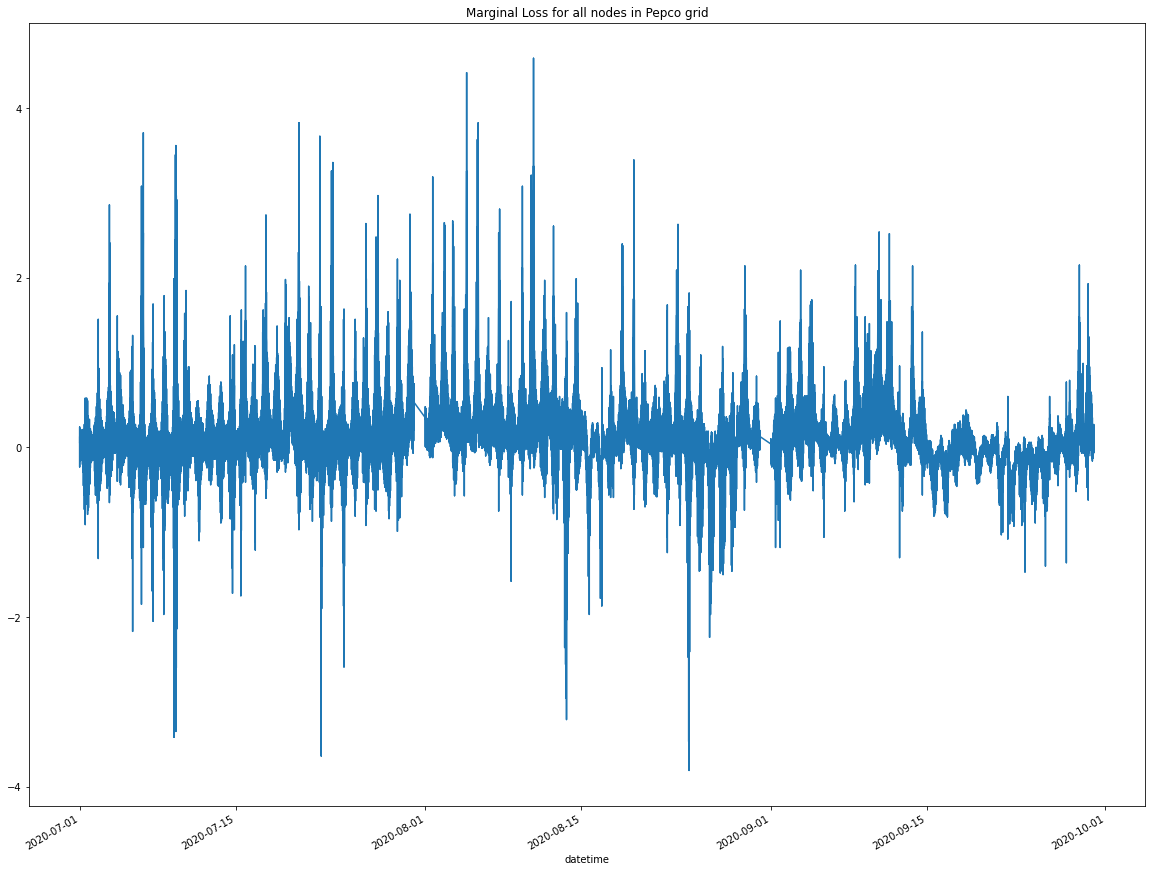

In [121]:
fig, ax = plt.subplots(figsize=(20,16))
marg_loss.plot()
ax.set(title='Marginal Loss for all nodes in Pepco grid')

In [122]:
marg_loss.head()

datetime
2020-07-01    0.12
2020-07-01    0.12
2020-07-01    0.12
2020-07-01    0.12
2020-07-01    0.10
Name: marginal_loss_price_rt, dtype: float64

In [ ]:
marg_loss.describe() 

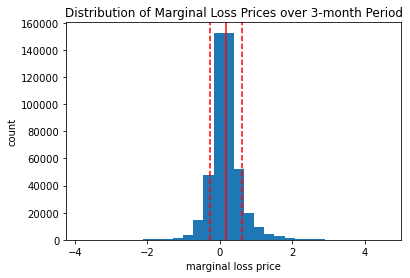

In [131]:
_ = plt.hist(marg_loss, bins=30)
_ = plt.xlabel('marginal loss price')
_ = plt.ylabel('count')
_ = plt.title('Distribution of Marginal Loss Prices over 3-month Period')
_ = plt.axvline(0.165758, color='r')
_ = plt.axvline(0.165758+ 0.437304, color='r', linestyle='--')
_ = plt.axvline(0.165758- 0.437304, color='r', linestyle='--')


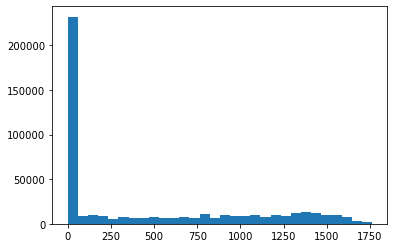

In [22]:
mw = solar['mw']
_ = plt.hist(mw, bins=30)


24.585854052156204

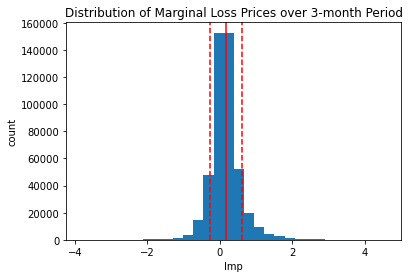

In [23]:
_ = plt.hist(marg_loss, bins=30)
_ = plt.xlabel('lmp')
_ = plt.ylabel('count')
_ = plt.title('Distribution of Marginal Loss Prices over 3-month Period')
_ = plt.axvline(0.165758, color='r')
_ = plt.axvline(0.165758+ 0.437304, color='r', linestyle='--')
_ = plt.axvline(0.165758- 0.437304, color='r', linestyle='--')

17.976688410698962
24.585854052156204

The marginal loss price for the Pepco energy grid is normally distributed. There appears to be minimal outliers, but is ever so slighlty skewed left. 

In [24]:
def marg_loss_sampler(n):
    return np.random.choice(marg_loss, n)


In [25]:
fifty_samples = marg_loss_sampler(50)
fifty_samples.mean()

0.3072

In [26]:
five100_samples = marg_loss_sampler(500)
five100_samples.mean()

0.1475

In [27]:
five1000 = marg_loss_sampler(5000)
five1000.mean()

0.173248

In [28]:
marg_loss_mean = np.mean(marg_loss)
marg_loss_std = np.std(marg_loss, ddof=0)
ppf = norm.ppf([0.975, 0.025], loc=marg_loss_mean, scale=marg_loss_std)
print(ppf)

[ 1.02285679 -0.69134081]


The point percentage function in conjunction with the above histogram shows that the marinal loss price is heavily cenetred around it's mean. 


1510.3297734620546
1216.3855141028212


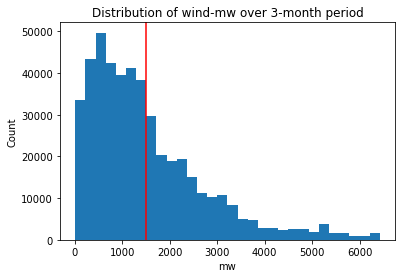

In [29]:
w_mean = np.mean(wind.mw)
w_std = np.std(wind.mw, ddof=0)
print(w_mean)
print(w_std)


_ = plt.hist(wind['mw'], bins=30)
_ = plt.xlabel('mw')
_ = plt.ylabel('Count')
_ = plt.title('Distribution of wind-mw over 3-month period')
_ = plt.axvline(w_mean, color='r')

471.83388811925397
563.8557892168087


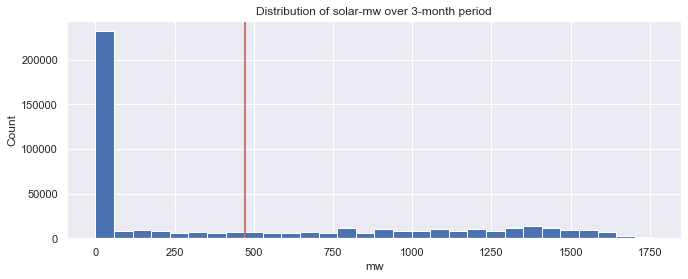

In [194]:
s_mean = np.mean(solar.mw)
s_std = np.std(solar.mw, ddof=0)
print(s_mean)
print(s_std)


_ = plt.hist(solar['mw'], bins=30)
_ = plt.xlabel('mw')
_ = plt.ylabel('Count')
_ = plt.title('Distribution of solar-mw over 3-month period')
_ = plt.axvline(s_mean, color='r')

In [195]:
solar_mw = solar['mw']
solar_mw.describe()

count    467208.000000
mean        471.833888
std         563.856393
min           0.000000
25%          10.600000
50%          66.000000
75%         979.000000
max        1761.100000
Name: mw, dtype: float64

Wind clearly has more variability in how much mw is produced/availableover th three month period. Wonder how this stark discrepancy infuences lmps?

## Correlation Heat Maps

In [196]:
solar.corr()

,pnode_id,system_energy_price_rt,total_lmp_rt,congestion_price_rt,marginal_loss_price_rt,row_is_current,version_nbr,solar_generation_mw,mw,fuel_percentage_of_total,is_renewable
pnode_id,1.000000e+00,-4.467325e-19,-0.004252,0.000371,-0.183638,5.477379e-17,-4.387186e-17,3.729405e-18,-1.650763e-17,9.525335e-17,NaN
system_energy_price_rt,-4.467325e-19,1.000000e+00,0.821285,0.125278,0.281539,-2.197929e-02,2.200903e-02,3.647415e-01,3.985117e-01,2.980978e-01,NaN
total_lmp_rt,-4.251840e-03,8.212854e-01,1.000000,0.668454,0.351933,-1.702761e-02,1.705050e-02,3.087442e-01,3.340170e-01,2.638913e-01,NaN
congestion_price_rt,3.708350e-04,1.252783e-01,0.668454,1.000000,0.207669,1.223763e-03,-1.223763e-03,6.315318e-02,6.253249e-02,7.245064e-02,NaN
marginal_loss_price_rt,-1.836381e-01,2.815394e-01,0.351933,0.207669,1.000000,-5.723529e-02,5.726566e-02,7.126924e-02,9.331164e-02,4.487364e-02,NaN
row_is_current,5.477379e-17,-2.197929e-02,-0.017028,0.001224,-0.057235,1.000000e+00,1.122020e-02,-6.672614e-03,1.946622e-02,1.345957e-02,NaN
version_nbr,-4.387186e-17,2.200903e-02,0.017051,-0.001224,0.057266,1.122020e-02,1.000000e+00,6.672614e-03,-1.946622e-02,-1.345957e-02,NaN
solar_generation_mw,3.729405e-18,3.647415e-01,0.308744,0.063153,0.071269,-6.672614e-03,6.672614e-03,1.000000e+00,9.694056e-01,8.889572e-01,NaN
mw,-1.650763e-17,3.985117e-01,0.334017,0.062532,0.093312,1.946622e-02,-1.946622e-02,9.694056e-01,1.000000e+00,9.113926e-01,NaN
fuel_percentage_of_total,9.525335e-17,2.980978e-01,0.263891,0.072451,0.044874,1.345957e-02,-1.345957e-02,8.889572e-01,9.113926e-01,1.000000e+00,NaN


In [72]:
wind.corr()

,pnode_id,system_energy_price_rt,total_lmp_rt,congestion_price_rt,marginal_loss_price_rt,row_is_current,version_nbr,wind_generation_mw,mw,fuel_percentage_of_total,is_renewable
pnode_id,1.000000e+00,-4.467325e-19,-0.004252,0.000371,-0.183638,5.477379e-17,-4.387186e-17,-7.048910e-19,-2.132014e-18,3.672529e-18,NaN
system_energy_price_rt,-4.467325e-19,1.000000e+00,0.821285,0.125278,0.281539,-2.197929e-02,2.200903e-02,-1.423463e-01,-1.957856e-01,-2.973055e-01,NaN
total_lmp_rt,-4.251840e-03,8.212854e-01,1.000000,0.668454,0.351933,-1.702761e-02,1.705050e-02,-1.253684e-01,-1.630409e-01,-2.437623e-01,NaN
congestion_price_rt,3.708350e-04,1.252783e-01,0.668454,1.000000,0.207669,1.223763e-03,-1.223763e-03,-3.248622e-02,-3.108638e-02,-3.801099e-02,NaN
marginal_loss_price_rt,-1.836381e-01,2.815394e-01,0.351933,0.207669,1.000000,-5.723529e-02,5.726566e-02,-4.441509e-02,6.422924e-03,-4.877456e-02,NaN
row_is_current,5.477379e-17,-2.197929e-02,-0.017028,0.001224,-0.057235,1.000000e+00,1.122020e-02,1.492743e-03,3.239424e-02,4.574003e-02,NaN
version_nbr,-4.387186e-17,2.200903e-02,0.017051,-0.001224,0.057266,1.122020e-02,1.000000e+00,-1.492743e-03,-3.239424e-02,-4.574003e-02,NaN
wind_generation_mw,-7.048910e-19,-1.423463e-01,-0.125368,-0.032486,-0.044415,1.492743e-03,-1.492743e-03,1.000000e+00,4.195998e-01,3.822935e-01,NaN
mw,-2.132014e-18,-1.957856e-01,-0.163041,-0.031086,0.006423,3.239424e-02,-3.239424e-02,4.195998e-01,1.000000e+00,9.408888e-01,NaN
fuel_percentage_of_total,3.672529e-18,-2.973055e-01,-0.243762,-0.038011,-0.048775,4.574003e-02,-4.574003e-02,3.822935e-01,9.408888e-01,1.000000e+00,NaN


<AxesSubplot:>

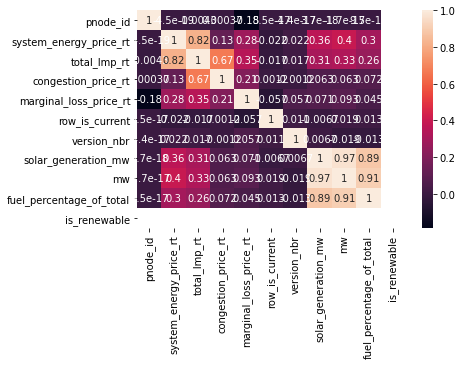

In [73]:
sns.heatmap(solar.corr(), annot=True )

<AxesSubplot:>

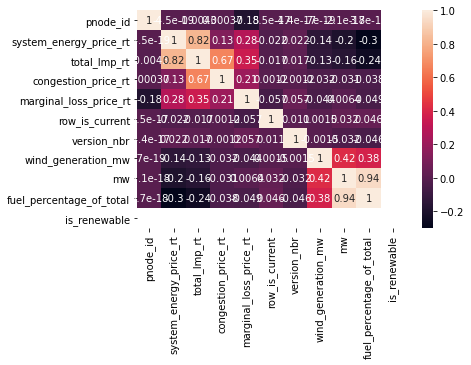

In [74]:
sns.heatmap(wind.corr(), annot=True)

C:\Users\Gabe\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='voltage_kv', ylabel='marginal_loss_price_rt'>

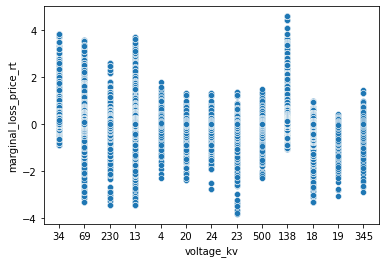

In [75]:
sns.scatterplot(solar['voltage_kv'], solar['marginal_loss_price_rt'], data=solar)

C:\Users\Gabe\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='fuel_percentage_of_total', ylabel='marginal_loss_price_rt'>

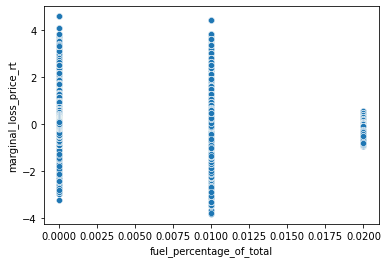

In [76]:
sns.scatterplot(solar['fuel_percentage_of_total'], solar['marginal_loss_price_rt'], data=solar)

C:\Users\Gabe\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='mw', ylabel='marginal_loss_price_rt'>

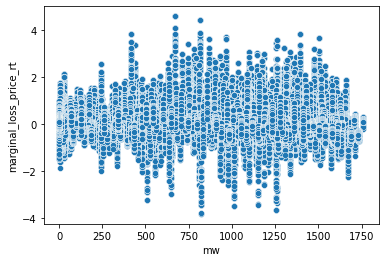

In [77]:
sns.scatterplot(solar['mw'], solar['marginal_loss_price_rt'], data=solar)

In [78]:
sns.set(rc={'figure.figsize':(11, 4)})

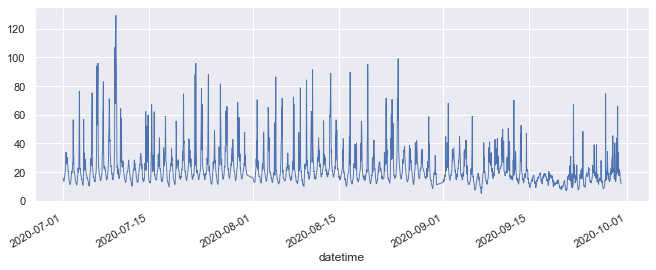

In [80]:
solar['system_energy_price_rt'].plot(linewidth=0.9);

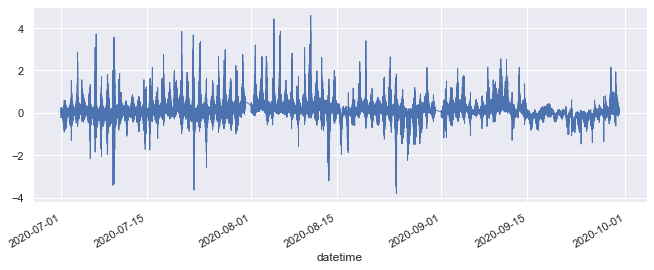

In [82]:
solar['marginal_loss_price_rt'].plot(linewidth=0.9);

In [102]:
solar['day_of_week'] = solar.index.dayofweek

In [103]:
solar.head()

,pnode_id,pnode_name,voltage_kv,equipment,type,system_energy_price_rt,total_lmp_rt,congestion_price_rt,marginal_loss_price_rt,row_is_current,version_nbr,solar_generation_mw,fuel_type,mw,fuel_percentage_of_total,is_renewable,day_of_week
datetime,,,,,,,,,,,,,,,,,
2020-07-01,49701,BELLSMIL,34,LD1B,LOAD,15.65,15.78,0.0,0.12,True,1,-1.153,Solar,21.9,0.0,True,2
2020-07-01,49702,BELLSMIL,34,LD2B,LOAD,15.65,15.78,0.0,0.12,True,1,-1.153,Solar,21.9,0.0,True,2
2020-07-01,49703,BELLSMIL,34,LD3B,LOAD,15.65,15.78,0.0,0.12,True,1,-1.153,Solar,21.9,0.0,True,2
2020-07-01,49704,BELLSMIL,34,LD4B,LOAD,15.65,15.78,0.0,0.12,True,1,-1.153,Solar,21.9,0.0,True,2
2020-07-01,49705,BELLSMIL,69,69-1,LOAD,15.65,15.76,0.0,0.10,True,1,-1.153,Solar,21.9,0.0,True,2


## Moving Average Denoising:
https://medium.com/analytics-vidhya/how-to-guide-on-exploratory-data-analysis-for-time-series-data-34250ff1d04f

## General trend seems to be neither multiplicative nor additive.

Checking for seasonality.

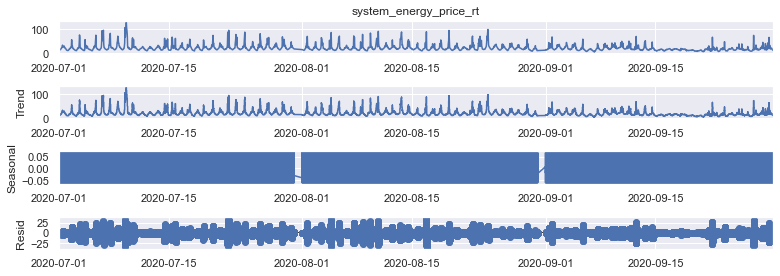

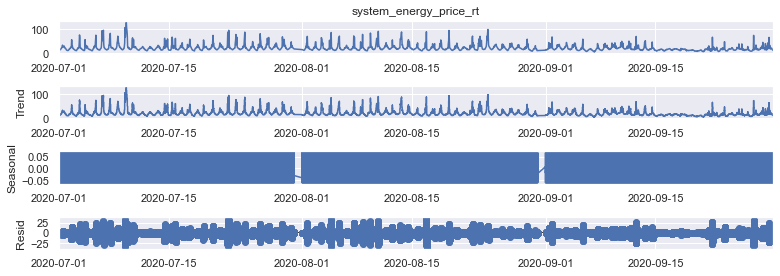

In [98]:


sys_enrg_price = solar['system_energy_price_rt']
mar_loss_price = solar[['marginal_loss_price_rt']]
# Plot the original data, the trend, the seasonality, and the residuals 

from statsmodels.tsa.seasonal import seasonal_decompose
sys_dec=seasonal_decompose(sys_enrg_price, period=92)
sys_dec.plot()


In [93]:
len(pd.Series(sys_enrg_price.index).map(pd.Timestamp.date).unique())

92

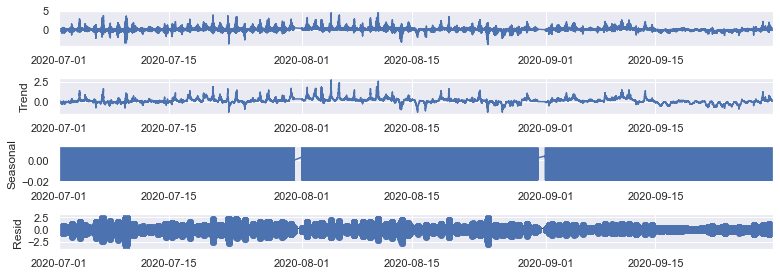

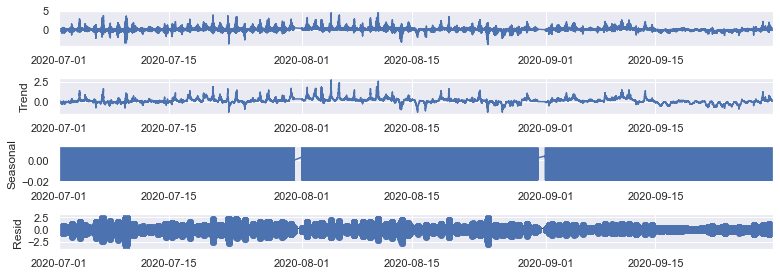

In [99]:
loss_dec=seasonal_decompose(mar_loss_price, period=92)
loss_dec.plot()

In [109]:
#zoom into a month
wind_perc_july = wind.loc['2020-07','fuel_percentage_of_total']
wind_perc_aug = wind.loc['2020-08','fuel_percentage_of_total']
wind_perc_sept = wind.loc['2020-09','fuel_percentage_of_total']
wind_perc_july_mean = wind_perc_july.mean()
wind_perc_aug_mean = wind_perc_aug.mean()
wind_perc_sept_mean = wind_perc_sept.mean()

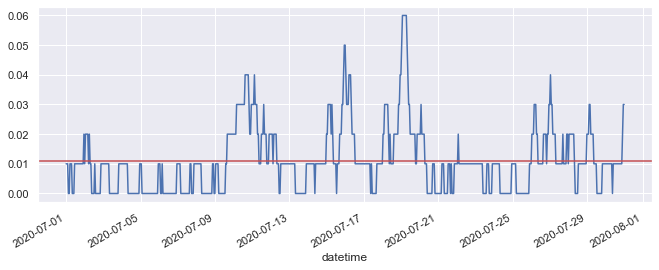

In [110]:
wind_perc_july.plot()
plt.axhline(y=wind_perc_july_mean, color='r', linestyle='-')

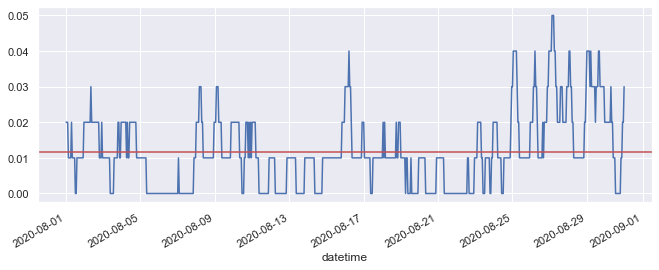

In [111]:
wind_perc_aug.plot()
plt.axhline(y=wind_perc_aug_mean, color='r', linestyle='-')

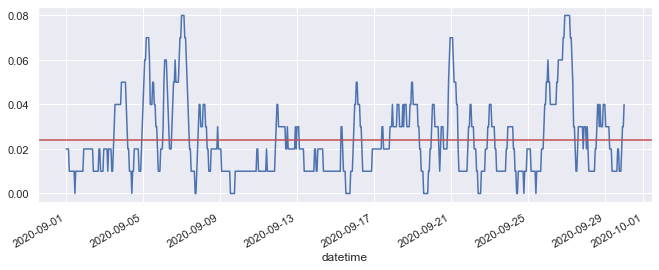

In [112]:
wind_perc_sept.plot()
plt.axhline(y=wind_perc_sept_mean, color='r', linestyle='-')

## It appears that the wind % avg was slowly creeping up over the 3-month timeframe. Perhaps around 1.3%. Significance?

Now we'll do same for Solar

## Below the fuel percentage of total reacts to whether it is night or day 

In [123]:
solar_perc_july = solar.loc['2020-07','fuel_percentage_of_total']
solar_perc_aug = solar.loc['2020-08','fuel_percentage_of_total']
solar_perc_sept = solar.loc['2020-09','fuel_percentage_of_total']
solar_perc_july_mean = solar_perc_july.mean()
solar_perc_aug_mean = solar_perc_aug.mean()
solar_perc_sept_mean = solar_perc_sept.mean()

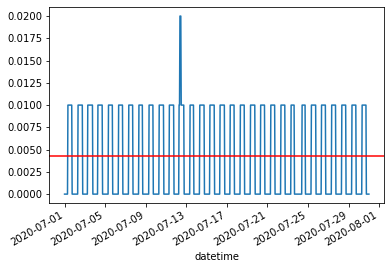

In [124]:
solar_perc_july.plot()
plt.axhline(y=solar_perc_july_mean, color='r', linestyle='-')

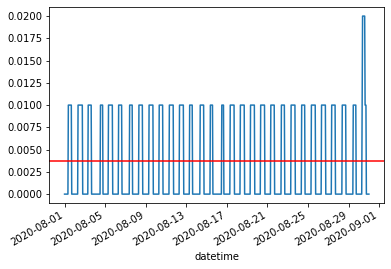

In [125]:
solar_perc_aug.plot()
plt.axhline(y=solar_perc_aug_mean, color='r', linestyle='-')

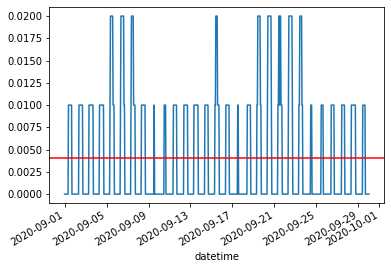

In [126]:
solar_perc_sept.plot()
plt.axhline(y=solar_perc_sept_mean, color='r', linestyle='-')

<AxesSubplot:xlabel='datetime'>

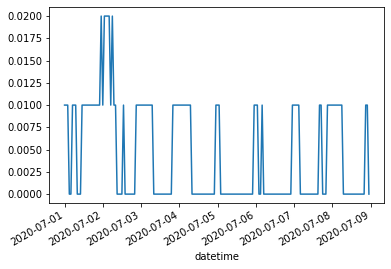

In [127]:
wind.loc['2020-07-01':'2020-07-08', 'fuel_percentage_of_total'].plot()

#### We can see there are spikes in fuel % of totla for both wind & solar datasets.  They always appear to rebound to .01

## clear signs of seasonality that corresponds with the difference of night and day

## Feature engineering 

In [124]:
import featuretools as ft

# Useful for showing multiple outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import featuretools.variable_types as vtypes

# Make empty entityset
es = ft.EntitySet(id = 'pepco_solar')

In [125]:
solar.dtypes
solar.

pnode_id                      int64
pnode_name                   object
voltage_kv                   object
equipment                    object
type                         object
system_energy_price_rt      float64
total_lmp_rt                float64
congestion_price_rt         float64
marginal_loss_price_rt      float64
row_is_current                 bool
version_nbr                   int64
solar_generation_mw         float64
fuel_type                    object
mw                          float64
fuel_percentage_of_total    float64
is_renewable                   bool
dtype: object

In [130]:
#only three so we can easily do dummy
solar.type.value_counts()

LOAD    352569
GEN     105987
EHV       8652
Name: type, dtype: int64

In [146]:

solar.voltage_kv.value_counts()
solar.voltage_kv.dtypes


69     183855
13      95172
138     90846
34      34608
18      19467
230     12978
500      8652
24       4326
23       4326
20       4326
4        4326
345      2163
19       2163
Name: voltage_kv, dtype: int64

dtype('int32')

In [145]:
solar['voltage_kv'] = solar.voltage_kv.astype(int)

## Add a new column category that bins voltage amounts

In [149]:
category = pd.cut(solar.voltage_kv, bins=[0,13,24,34,69,138,345,500], labels=['low_kv', 'mid_kv', '34', '69', '138', 'high_kv', '500'])
solar.insert(3, 'Voltage_group', category)

In [152]:
solar_cat = solar.drop(columns = 'voltage_kv')

In [154]:
solar_cat.head()

,pnode_id,pnode_name,Voltage_group,equipment,type,system_energy_price_rt,total_lmp_rt,congestion_price_rt,marginal_loss_price_rt,row_is_current,version_nbr,solar_generation_mw,fuel_type,mw,fuel_percentage_of_total,is_renewable
datetime,,,,,,,,,,,,,,,,
2020-07-01,49701,BELLSMIL,34,LD1B,LOAD,15.65,15.78,0.0,0.12,True,1,-1.153,Solar,21.9,0.0,True
2020-07-01,49702,BELLSMIL,34,LD2B,LOAD,15.65,15.78,0.0,0.12,True,1,-1.153,Solar,21.9,0.0,True
2020-07-01,49703,BELLSMIL,34,LD3B,LOAD,15.65,15.78,0.0,0.12,True,1,-1.153,Solar,21.9,0.0,True
2020-07-01,49704,BELLSMIL,34,LD4B,LOAD,15.65,15.78,0.0,0.12,True,1,-1.153,Solar,21.9,0.0,True
2020-07-01,49705,BELLSMIL,69,69-1,LOAD,15.65,15.76,0.0,0.10,True,1,-1.153,Solar,21.9,0.0,True


In [ ]:
#for x in solar.voltage_kv:
#    low_kv = [4, 13]
#    mid_kv = [18, 19, 20, 23, 24]
#    upper_kv = [230, 345]
#    if solar.voltage_kv[x] in low_kv:
#        solar[low_kv] = 1
#    elif solar.voltage_kv[x] in mid_kv:
#        solar[mid_kv] = 1
#    elif solar.voltage_kv[x] in upper_kv:
#        solar[upper_kv] = 1
#    else:
#        pass

In [135]:
#216 pnodes 

solar.pnode_id.value_counts()

2156108941    2163
49744         2163
49738         2163
49737         2163
49736         2163
              ... 
1388599594    2163
1388599595    2163
50823         2163
50822         2163
1318144041    2163
Name: pnode_id, Length: 216, dtype: int64

In [155]:
one_hot_coded = pd.get_dummies(solar, columns=['Voltage_group'], prefix='volt')

In [156]:
one_hot_coded.head()

,pnode_id,pnode_name,voltage_kv,equipment,type,system_energy_price_rt,total_lmp_rt,congestion_price_rt,marginal_loss_price_rt,row_is_current,...,mw,fuel_percentage_of_total,is_renewable,volt_low_kv,volt_mid_kv,volt_34,volt_69,volt_138,volt_high_kv,volt_500
datetime,,,,,,,,,,,,,,,,,,,,,
2020-07-01,49701,BELLSMIL,34,LD1B,LOAD,15.65,15.78,0.0,0.12,True,...,21.9,0.0,True,0,0,1,0,0,0,0
2020-07-01,49702,BELLSMIL,34,LD2B,LOAD,15.65,15.78,0.0,0.12,True,...,21.9,0.0,True,0,0,1,0,0,0,0
2020-07-01,49703,BELLSMIL,34,LD3B,LOAD,15.65,15.78,0.0,0.12,True,...,21.9,0.0,True,0,0,1,0,0,0,0
2020-07-01,49704,BELLSMIL,34,LD4B,LOAD,15.65,15.78,0.0,0.12,True,...,21.9,0.0,True,0,0,1,0,0,0,0
2020-07-01,49705,BELLSMIL,69,69-1,LOAD,15.65,15.76,0.0,0.10,True,...,21.9,0.0,True,0,0,0,1,0,0,0


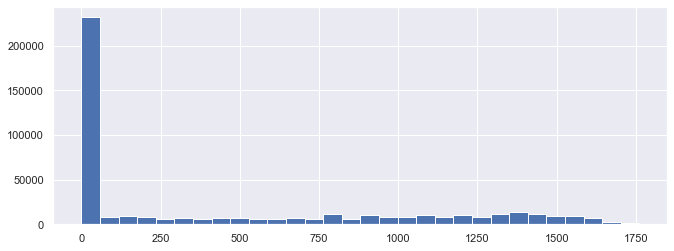

In [158]:
mw = solar['mw']
_ = plt.hist(mw, bins=30)


## mw is not normally distributed (long right tail), so use log transoformation

PowerTransformer()

array([[<AxesSubplot:title={'center':'mw'}>,
        <AxesSubplot:title={'center':'mw_LG'}>]], dtype=object)

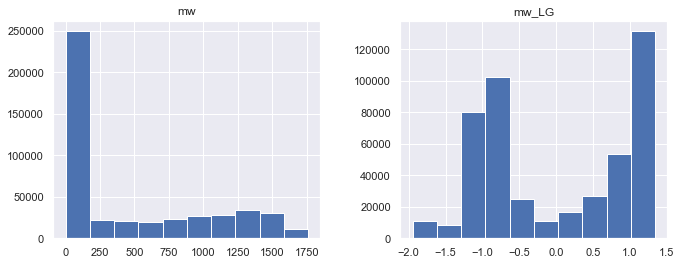

In [161]:
from sklearn.preprocessing import PowerTransformer

pow_trans = PowerTransformer()
pow_trans.fit(one_hot_coded[['mw']])

solar['mw_LG'] = pow_trans.transform(solar[['mw']], 2)

solar[['mw', 'mw_LG']].hist()
plt.show()
#i don't undertstand why I need to do this?
#does my normally distributed data need to be standardized, too?

## Train/Test split

In [169]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(solar.drop(columns='total_lmp_rt'), solar.total_lmp_rt, test_size=0.33)

In [170]:
X_train.shape, X_test.shape

((313029, 17), (154179, 17))

In [171]:
y_train.shape, y_test.shape

((313029,), (154179,))

# Create Mask

In [ ]:
mask = df["country"].isin(counts[counts < 5].index)

TO-DO

i need to create cude linear regression models 
https://github.com/JNYH/DataCamp_Machine_Learning_for_Time_Series_Data_in_Python/blob/main/chapter3_Predicting_Time_Series_Data.pdf\

does PCA() need to be done
    -is it normally done with time series analysis?
    -at what point should i do it
    
check for seasonality, and periodicity
    -https://www.springboard.com/workshops/data-science-career-track/learn#/curriculum/18843 @26:59

do autocorrelation 
    -https://www.springboard.com/workshops/data-science-career-track/learn#/curriculum/18843 @31:27
    


## Create day of the week to check for seasonality 

##### wind['day_of_week'] = wind.index.dayofweek

In [114]:


wind_49705 = wind.loc[wind['pnode_id'] == 49705]
wind_lmp_49705 = wind_49705['total_lmp_rt']
wind_49705_day = wind_49705[['total_lmp_rt' , 'day_of_week']]
len(wind_lmp_49705)

2163

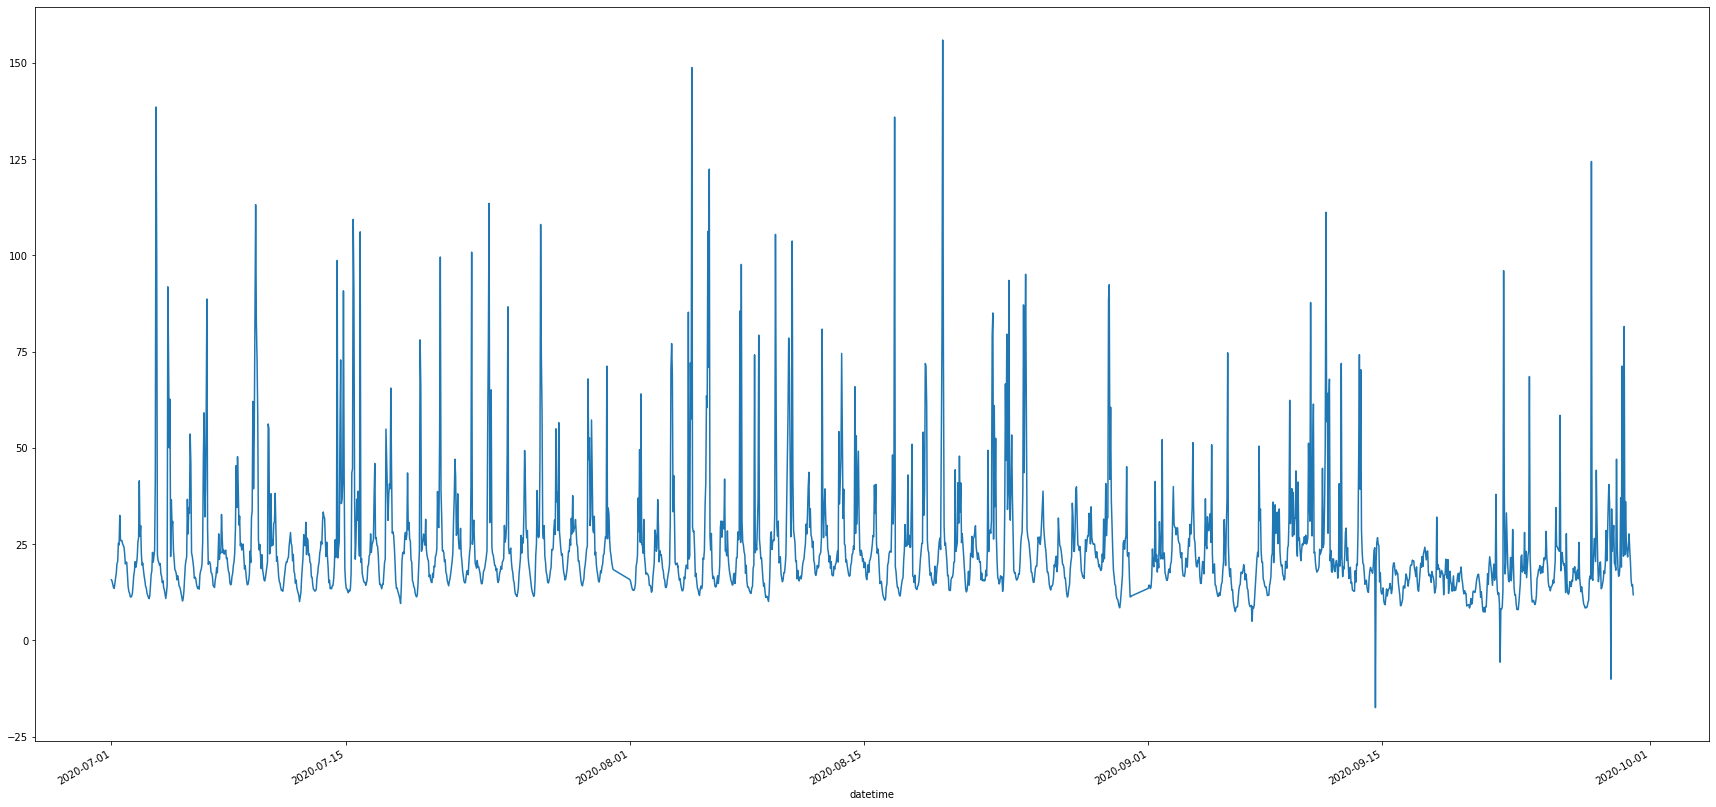

In [115]:
from matplotlib.pyplot import figure
plt.rcParams["figure.figsize"] = (30,15)

wind_lmp_49705.plot()

plt.show()


<AxesSubplot:xlabel='datetime'>

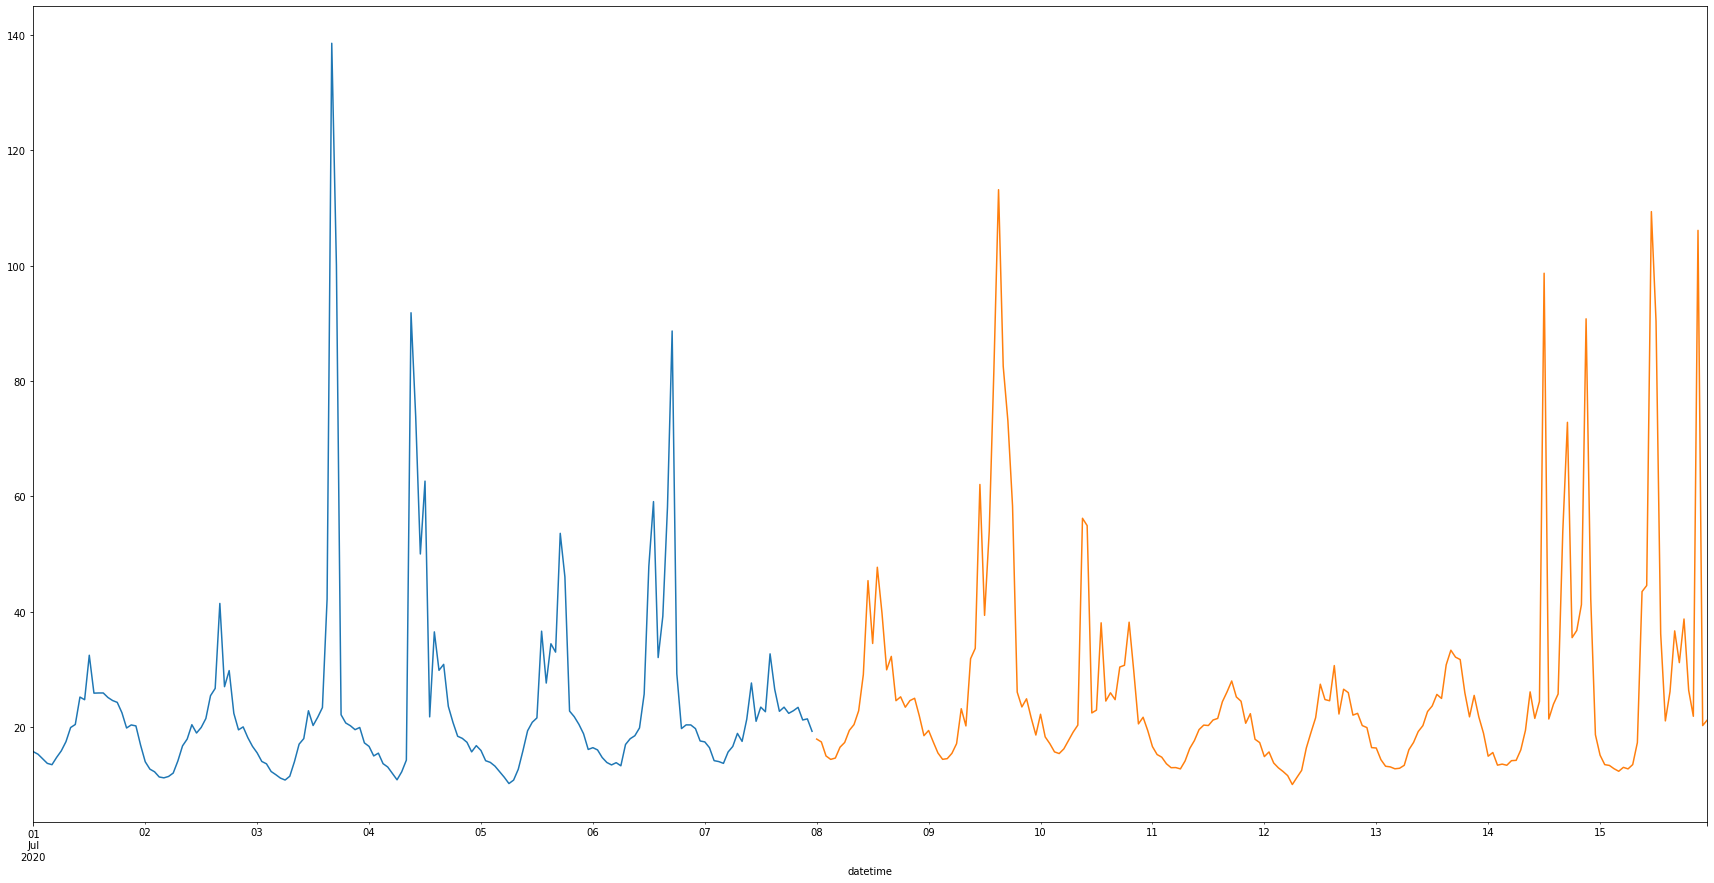

In [116]:
wind_lmp_49705['2020-07-01':'2020-07-07'].plot()
wind_lmp_49705['2020-07-08':'2020-07-15'].plot()

<AxesSubplot:xlabel='day_of_week'>

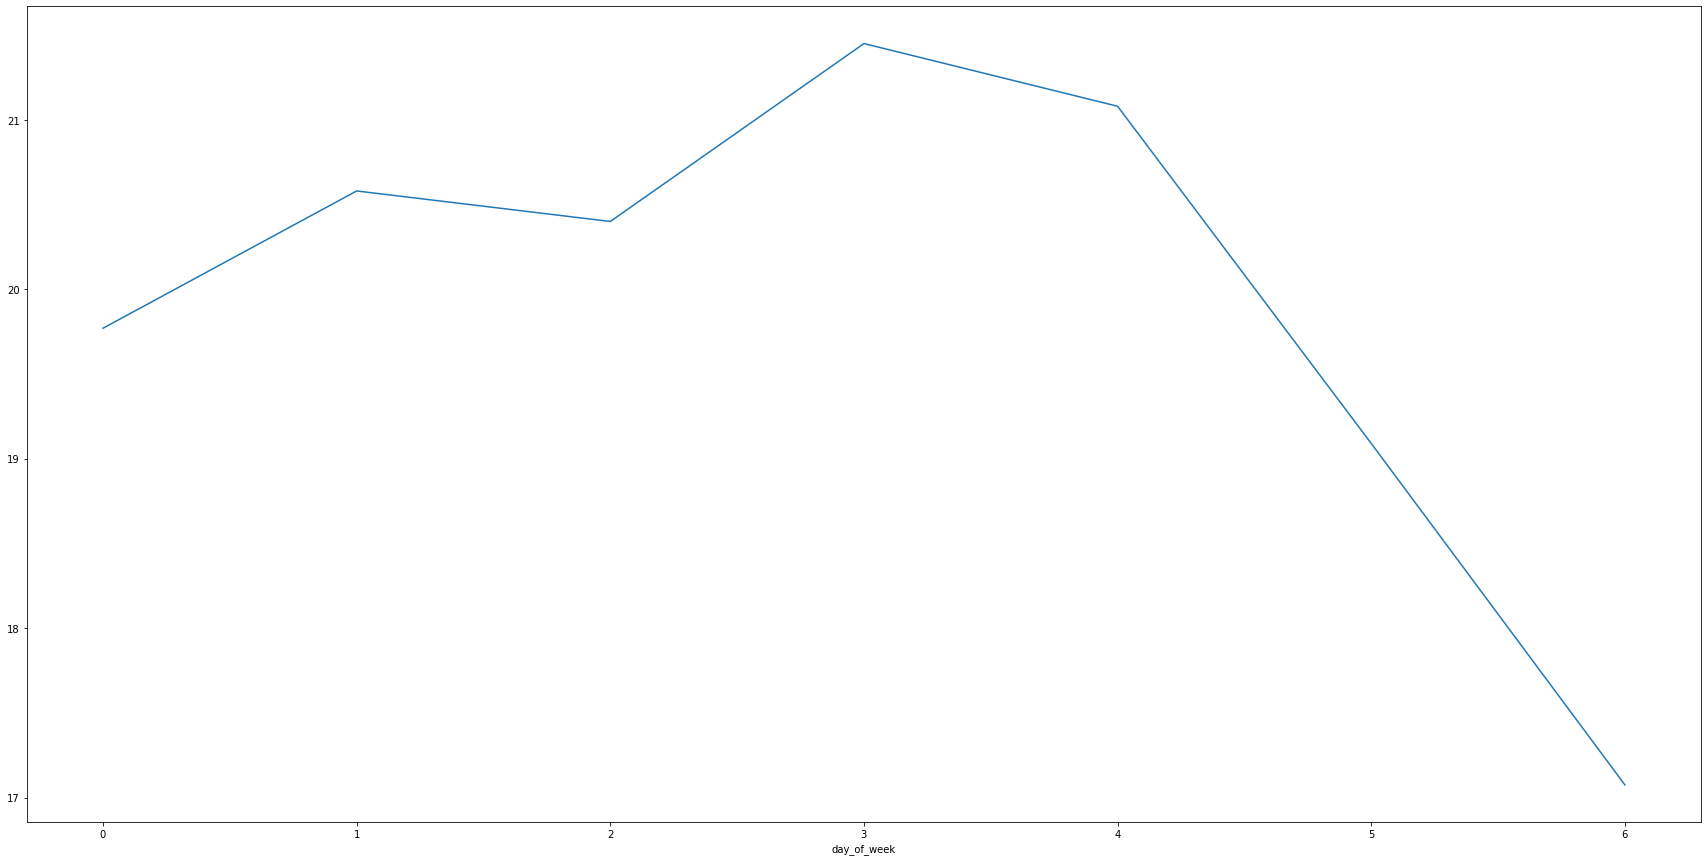

In [117]:
wind_49705_day.head(1)
wind_49705.groupby('day_of_week').median()['total_lmp_rt'].plot()

### major decrease in total locationa marginal pricing on Sat/Sun, peaked Thursday.

<AxesSubplot:xlabel='datetime'>

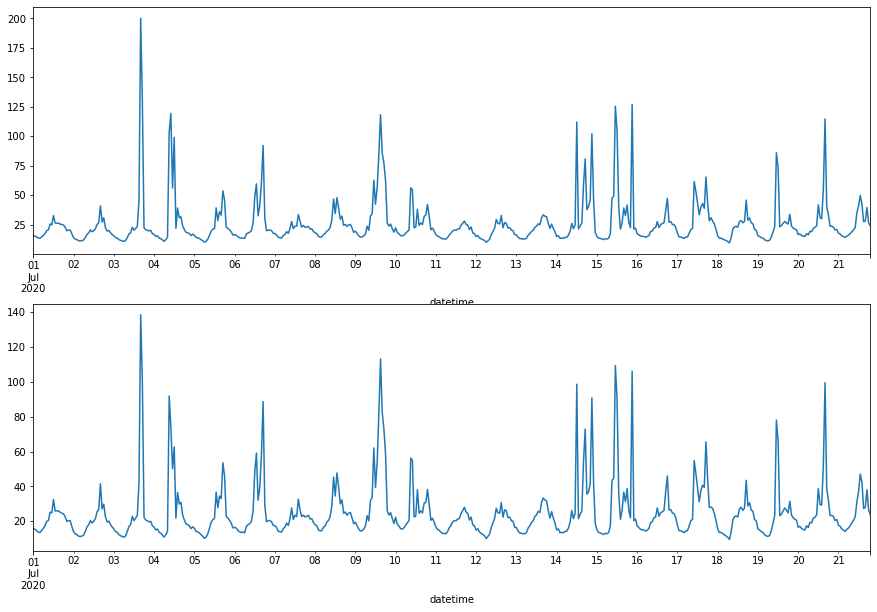

In [126]:
fig, axs = plt.subplots(2, 1, figsize=(15, 10))
wind_lmp_31020663.iloc[:500].plot(ax=axs[0])
wind_lmp_49705.iloc[:500].plot(ax=axs[1])


<AxesSubplot:xlabel='datetime'>

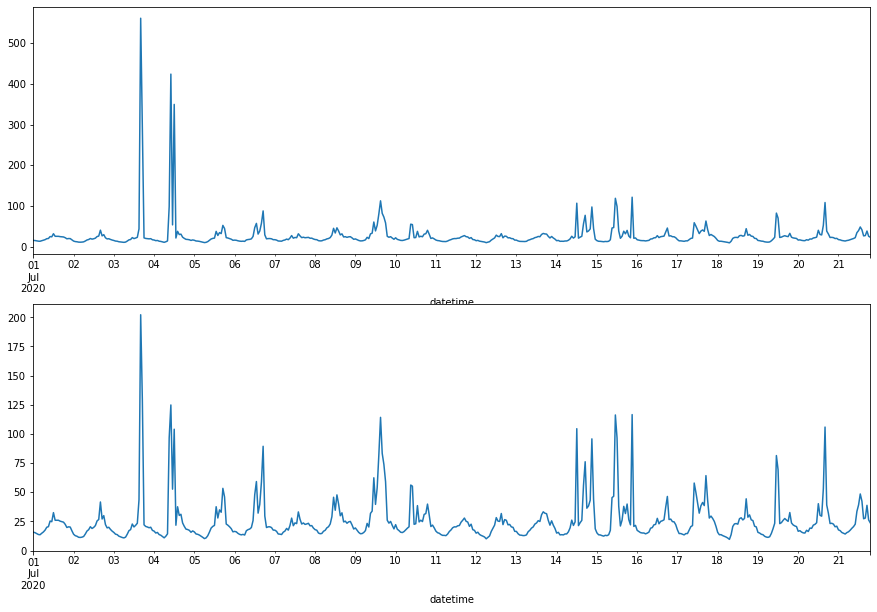

In [127]:
wind_5021002 = wind.loc[wind['pnode_id'] == 5021002]
wind_lmp_5021002 = wind_5021002['total_lmp_rt']

fg1, axs1 = plt.subplots(2,1, figsize=(15,10))
wind_lmp_50810.iloc[:500].plot(ax=axs1[0])
wind_lmp_5021002.iloc[:500].plot(ax=axs1[1])

C:\Users\Gabe\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:660: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  FutureWarning,
C:\Users\Gabe\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:669: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning,


[ 1.          0.55497079  0.41365512  0.31758732  0.2380513   0.16304641
  0.04858634 -0.02122375 -0.09708671 -0.12899602 -0.17435119 -0.20622667
 -0.2124792  -0.20697986 -0.18300523 -0.14668073 -0.09114228 -0.01131799
  0.06941234  0.12235673  0.15700308  0.20072396  0.24093207  0.31307604
  0.37624887  0.34051668  0.25728047  0.22401085  0.17395454  0.09915621
  0.03759977 -0.04519424 -0.10190791 -0.1332232  -0.18057724 -0.20238048
 -0.19687764 -0.18882239 -0.17287108 -0.14932933 -0.10061617]


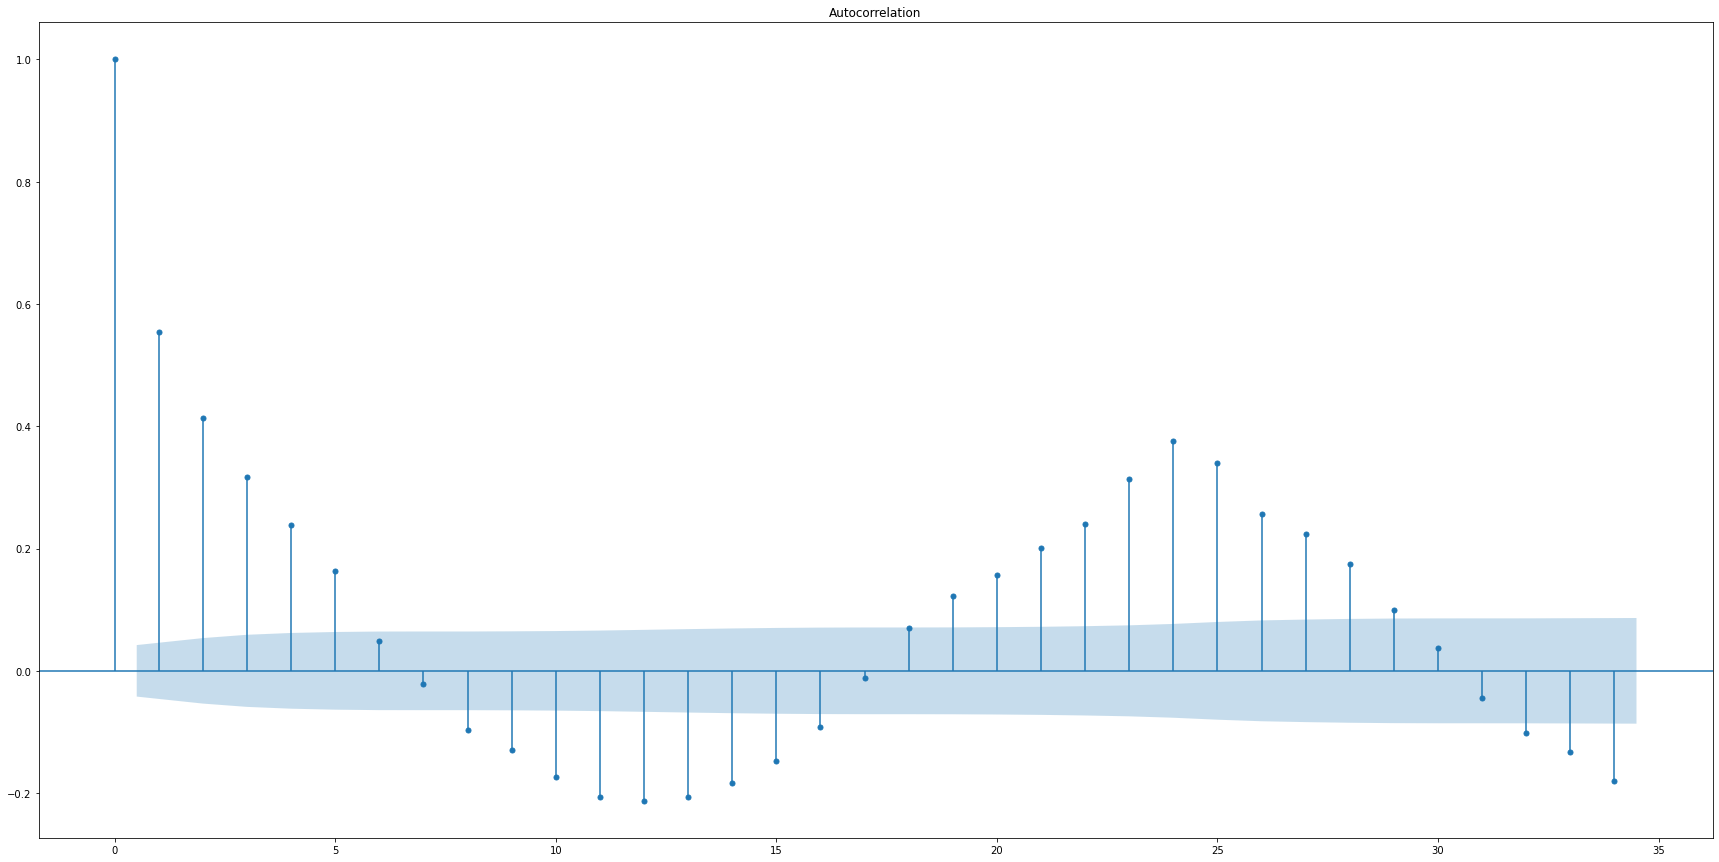

In [120]:
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf 
#https://campus.datacamp.com/courses/time-series-analysis-in-python/some-simple-time-series?ex=2

acf_array = acf(wind_lmp_49705)
print(acf_array)

plot_acf(wind_lmp_49705, alpha=.05) #argument alpha=1 to suppresses the confidence interval
plt.show()

In [121]:
solar.iloc[277]

wind_50810 = wind.loc[wind['pnode_id'] == 50810]
wind_lmp_50810 = wind_50810['total_lmp_rt']


C:\Users\Gabe\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:660: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  FutureWarning,
C:\Users\Gabe\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:669: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning,


[ 1.          0.42533477  0.31209786  0.16474127  0.10877199  0.07012397
  0.00972755 -0.02748019 -0.06472527 -0.08263515 -0.10442221 -0.12052246
 -0.12391588 -0.12134586 -0.10816269 -0.09129628 -0.04817728  0.09060247
  0.19847409  0.13378033  0.20156069  0.09195998  0.1121716   0.14791818
  0.17976442  0.1624197   0.11259765  0.09850683  0.07533577  0.04038845
  0.0083024  -0.03248028 -0.06245943 -0.08286284 -0.10745165 -0.11917806
 -0.11515236 -0.11252551 -0.10492152 -0.09223649 -0.0659639 ]


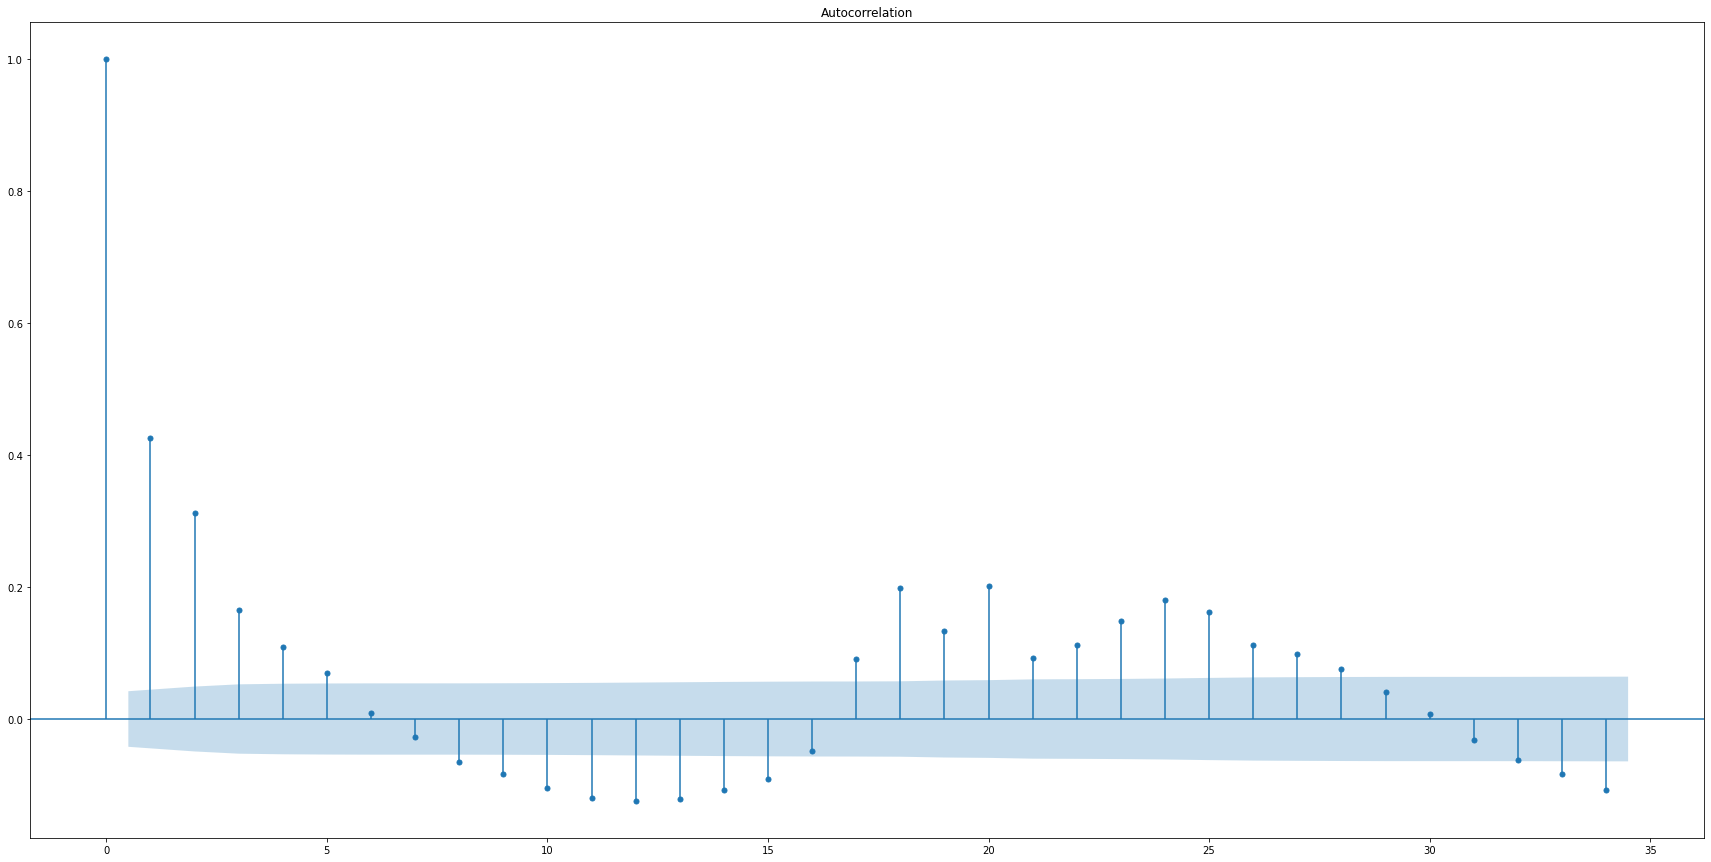

In [122]:
acf_array = acf(wind_lmp_50810)
print(acf_array)

plot_acf(wind_lmp_50810, alpha=.05) #argument alpha=1 to suppresses the confidence interval
plt.show()

In [240]:
solar.iloc[3145]

pnode_id                    31020663
pnode_name                   METZTAP
voltage_kv                        69
equipment                   WHITEOAK
type                             GEN
system_energy_price_rt         26.45
total_lmp_rt                   26.26
congestion_price_rt            -0.39
marginal_loss_price_rt           0.2
row_is_current                  True
version_nbr                        1
solar_generation_mw          350.021
fuel_type                      Solar
mw                            1061.5
fuel_percentage_of_total        0.01
is_renewable                    True
Name: 2020-07-01 14:00:00, dtype: object

C:\Users\Gabe\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:660: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  FutureWarning,
C:\Users\Gabe\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:669: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning,


[ 1.00000000e+00  5.46548659e-01  3.99768258e-01  2.96849274e-01
  2.17689607e-01  1.51098520e-01  4.02021435e-02 -2.41185868e-02
 -9.29467474e-02 -1.20360881e-01 -1.61453874e-01 -1.92211206e-01
 -1.98194137e-01 -1.93241949e-01 -1.69799894e-01 -1.38239112e-01
 -8.21776813e-02 -7.96586731e-04  7.47604536e-02  1.20687562e-01
  1.44921667e-01  1.78258243e-01  2.12430604e-01  2.82798030e-01
  3.38104131e-01  3.07026599e-01  2.23426809e-01  1.93613912e-01
  1.54600247e-01  8.29085472e-02  2.70236649e-02 -5.09684730e-02
 -1.01982229e-01 -1.26119491e-01 -1.69213850e-01 -1.88379533e-01
 -1.81986222e-01 -1.75030884e-01 -1.59549644e-01 -1.38101320e-01
 -9.42539713e-02]


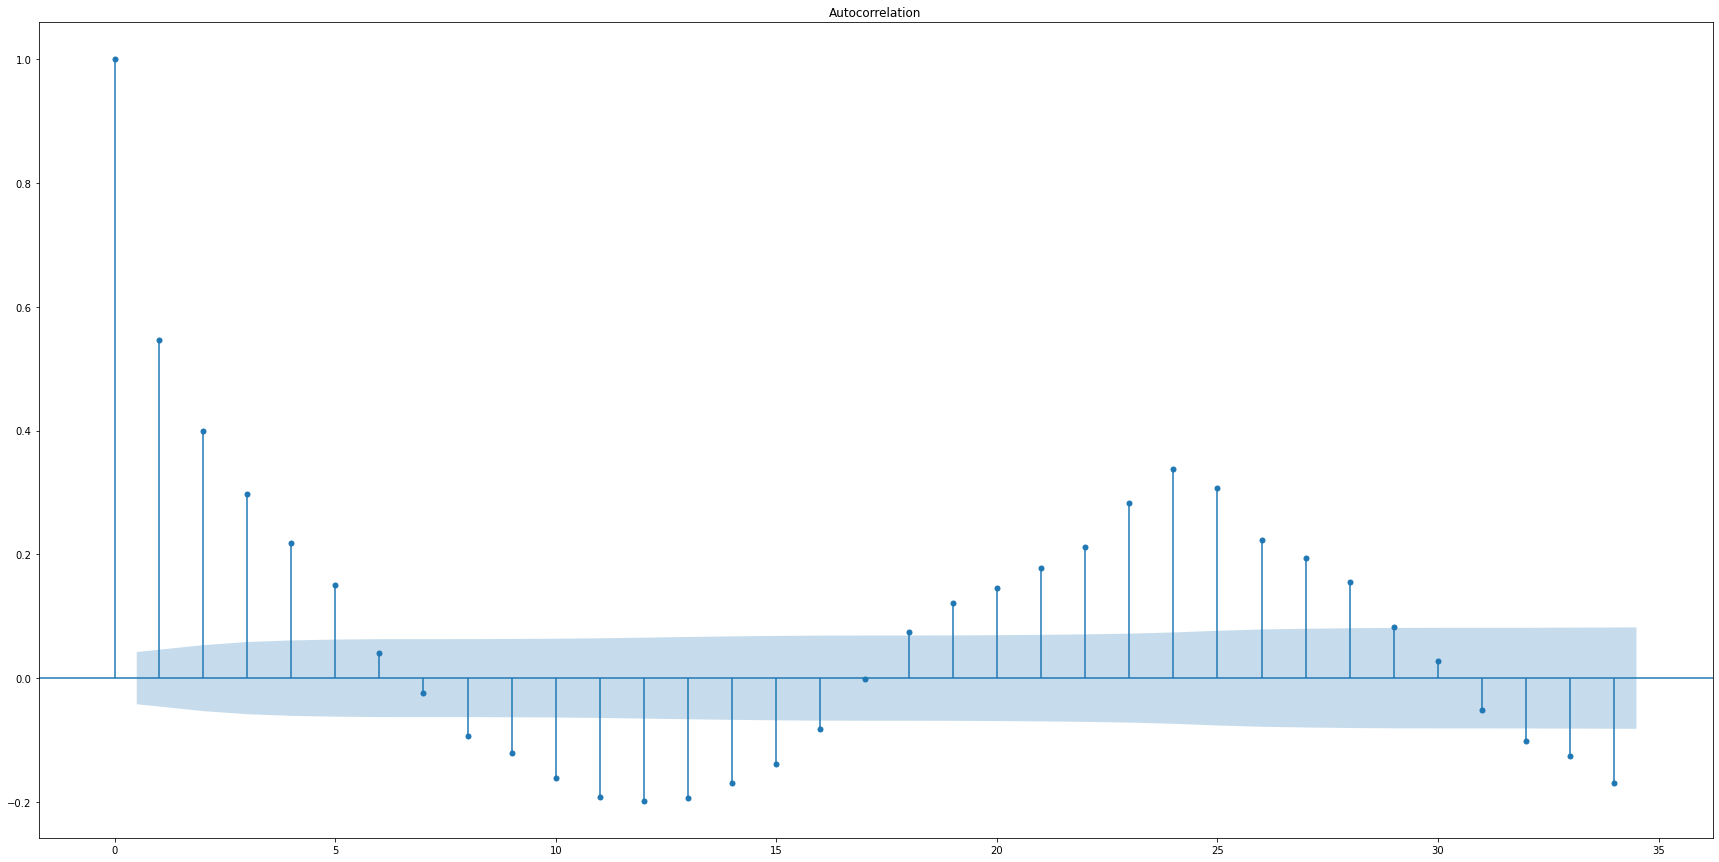

In [123]:
wind_31020663 = wind.loc[wind['pnode_id'] == 31020663]
wind_lmp_31020663 = wind_31020663['total_lmp_rt']
acf_array = acf(wind_lmp_31020663)
print(acf_array)
plot_acf(wind_lmp_31020663, alpha=.05) #argument alpha=1 to suppresses the confidence interval
plt.show()

### It could be said that thier is still measurable influence 4 or 5 periods after the intial measurement

# Comparing mw of wind and solar

### Wind appears to be addiditive 

In [142]:
solar_column = ['mw','solar_generation_mw','fuel_percentage_of_total']
wind_column = ['mw', 'wind_generation_mw', 'fuel_percentage_of_total']

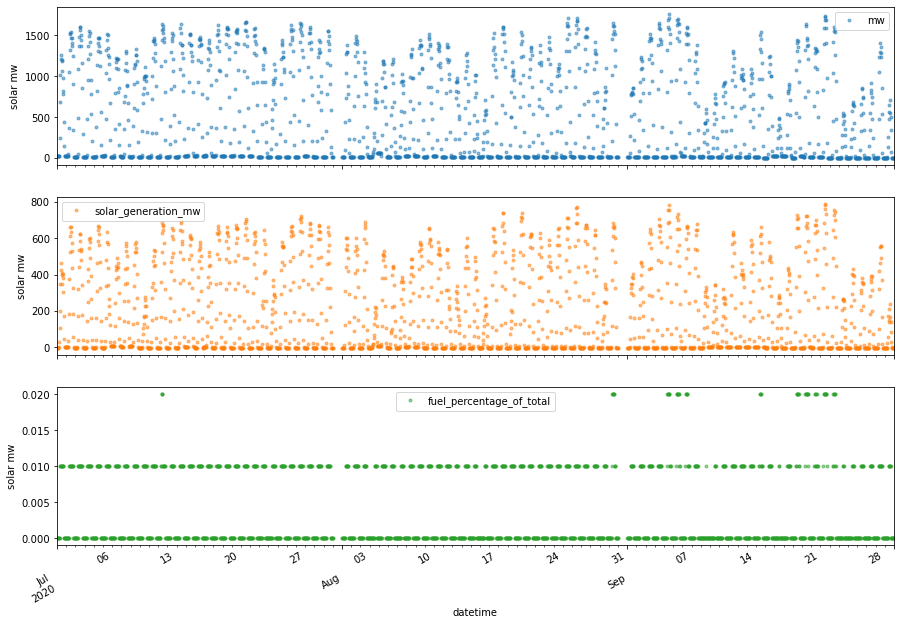

In [145]:
axes_solar = hourly_solar[solar_column].plot(marker='.', alpha=0.5, linestyle='None', figsize=(15,11), subplots=True)
for ax in axes_solar:
    ax.set_ylabel('solar mw')

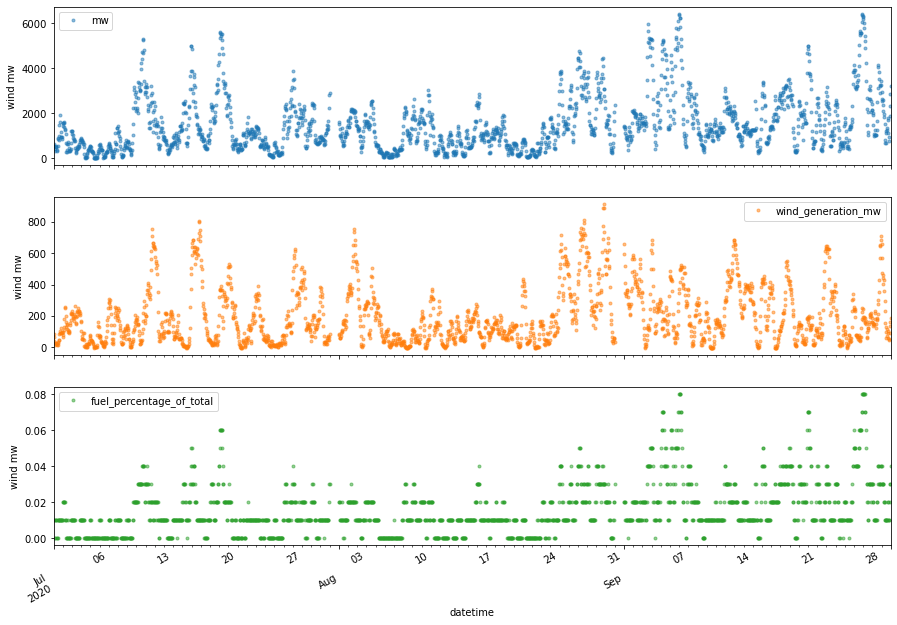

In [146]:
axes_wind = hourly_wind[wind_column].plot(marker='.', alpha=0.5, linestyle='None', figsize=(15,11), subplots=True)
for ax in axes_wind:
    ax.set_ylabel('wind mw')

In [148]:
# Trend decomposition using statmodels

#from statsmodels.tsa.seasonal import seasonal_decompose
#wind_mw_decompose = hourly_wind['wind_generation_mw']
#result_wind_mw = seasonal_decompose(wind_mw_decompose, model='addiditive')

#result_wind_mw.plot()
#plt.show()

ValueError: This function does not handle missing values

## Clear patterns in the wind mw data.

In [124]:
#going to compare correlation among p_node's lmps
#https://campus.datacamp.com/courses/time-series-analysis-in-python/correlation-and-autocorrelation?ex=5
df = pd.DataFrame({'wind_lmp_50810': wind_lmp_50810,'wind_lmp_49705': wind_lmp_49705})
df.head(1)

,wind_lmp_50810,wind_lmp_49705
datetime,,
2020-07-01,15.51,15.76


Correlation of 50810 and 49705 is:  0.8640280086637752


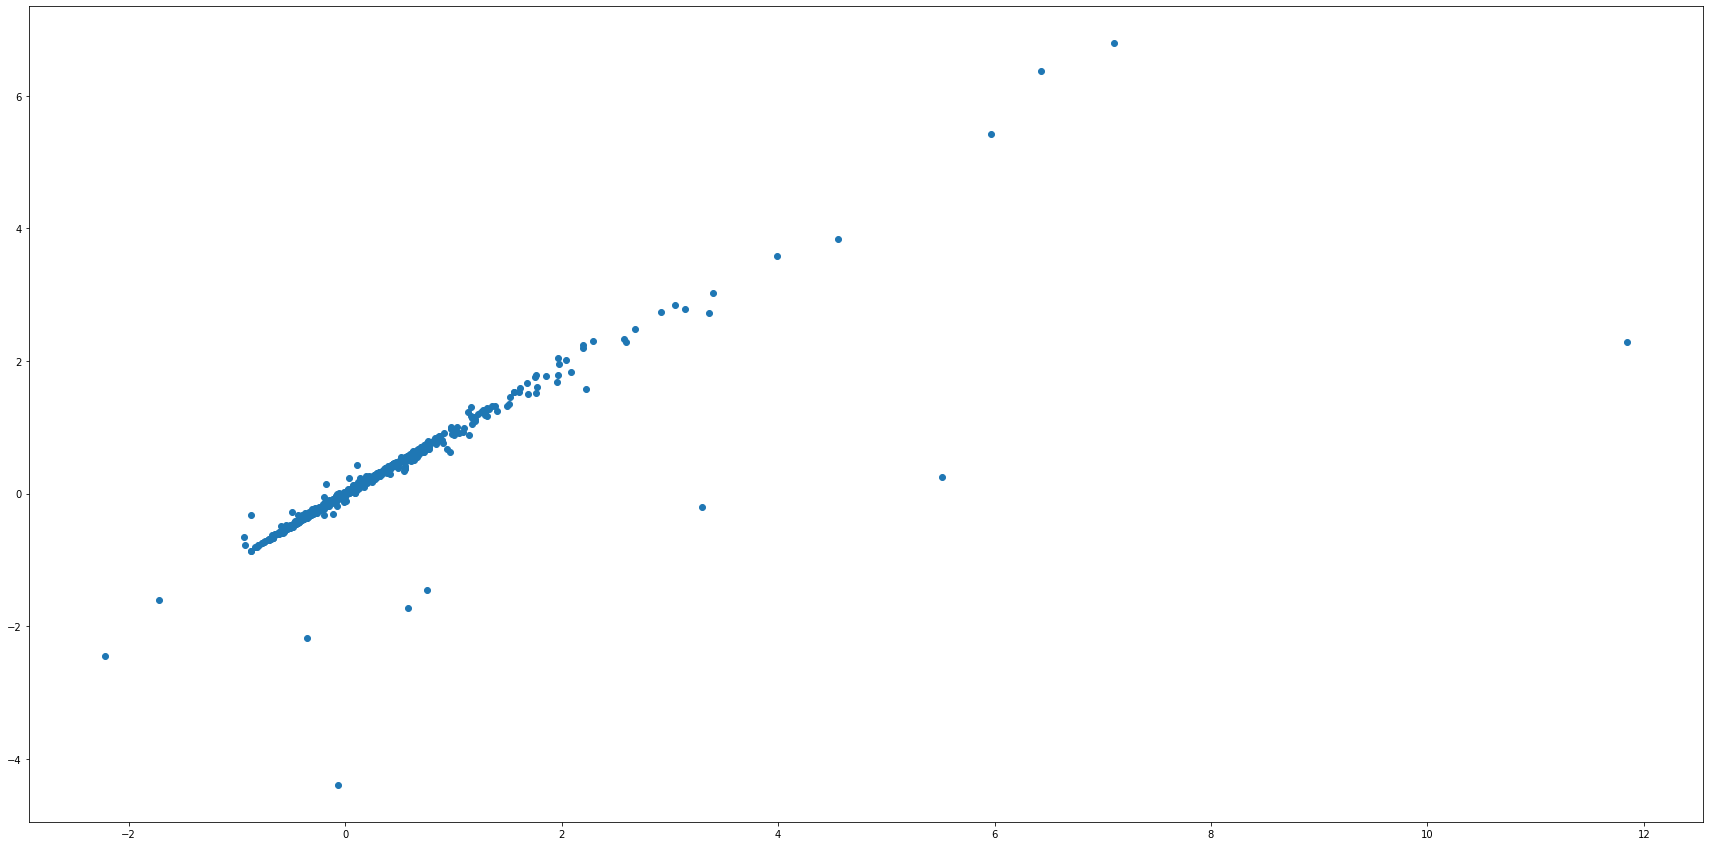

In [142]:
pct_change = df.pct_change()
correlation = pct_change.wind_lmp_50810.corr(pct_change.wind_lmp_49705)
print("Correlation of 50810 and 49705 is: ", correlation)



plt.scatter(pct_change.wind_lmp_50810, pct_change.wind_lmp_49705)
plt.show()

#print(wind.loc[wind['pnode_id'] == 50810].head(1)) 13kv CT2 Gen
#print(wind.loc[wind['pnode_id'] == 49705].head(1)) 69kv 69-1 load

Correlation of 21020663 and 5021002 is:  0.9633981378256771


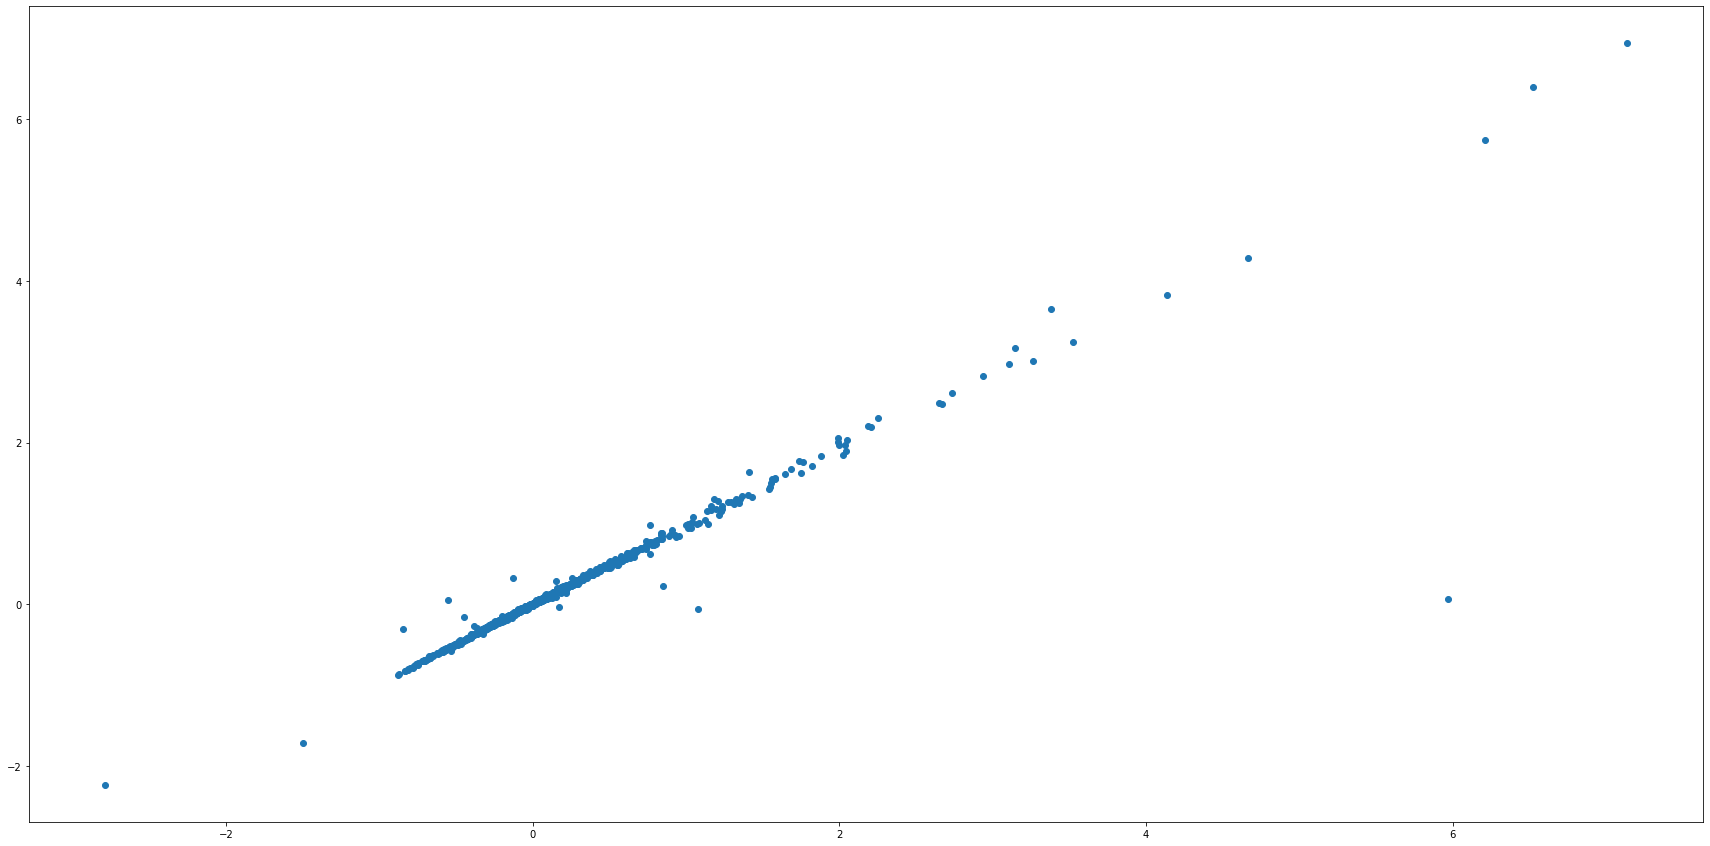

In [144]:
df_2 = pd.DataFrame({'wind_lmp_31020663': wind_lmp_31020663, 'wind_lmp_5021002': wind_lmp_5021002})
pct_change2 = df_2.pct_change()
correlation2 = pct_change2.wind_lmp_31020663.corr(pct_change2.wind_lmp_5021002)

#ind_lmp_31020663.iloc[:500].plot(ax=axs[0])
#wind_lmp_5021002 = wind_31020663['total_lmp_rt']

print("Correlation of 21020663 and 5021002 is: ", correlation2)
plt.scatter(pct_change2.wind_lmp_31020663, pct_change2.wind_lmp_5021002)
plt.show()
#print(wind.loc[wind['pnode_id'] == 31020663].head(1)) #69k, whiteoak, gen
#print(wind.loc[wind['pnode_id'] == 5021002].head(1)) #138k, load t1, load

Correlation of (two 68kvs) 31020663 and 49705 is:  0.9211571258790269


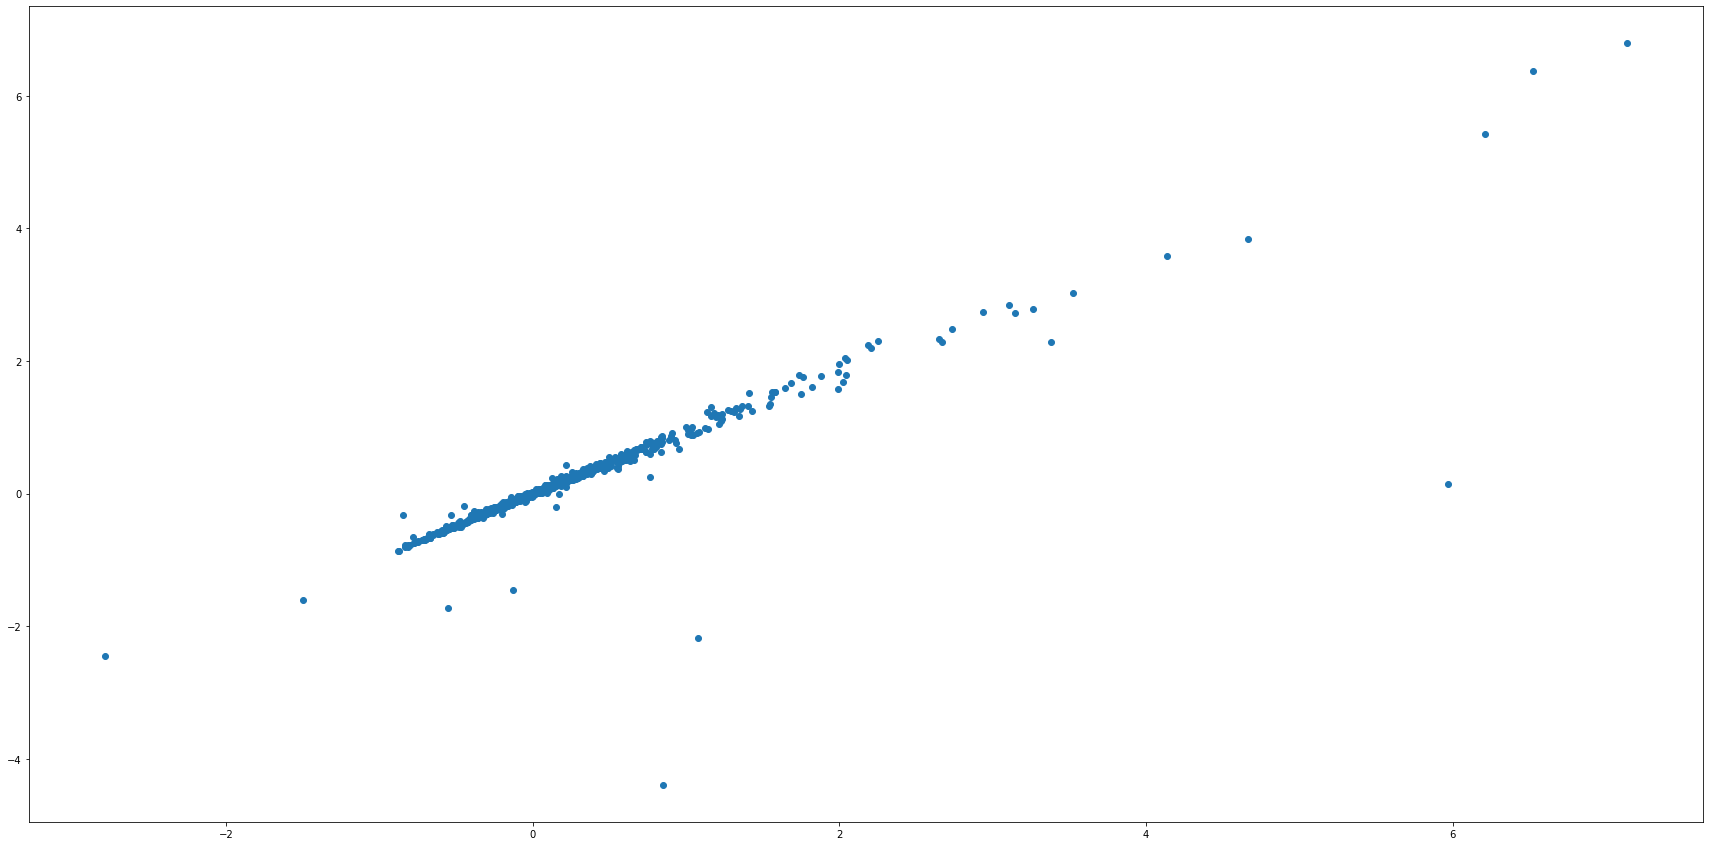

In [145]:
df_3 = pd.DataFrame({'wind_lmp_31020663': wind_lmp_31020663, 'wind_lmp_49705': wind_lmp_49705})
pct_change3 = df_3.pct_change()
correlation3 = pct_change3.wind_lmp_31020663.corr(pct_change3.wind_lmp_49705)

#ind_lmp_31020663.iloc[:500].plot(ax=axs[0])
#wind_lmp_5021002 = wind_31020663['total_lmp_rt']

print("Correlation of (two 68kvs) 31020663 and 49705 is: ", correlation3)
plt.scatter(pct_change3.wind_lmp_31020663, pct_change3.wind_lmp_49705)
plt.show()
#print(wind.loc[wind['pnode_id'] == 31020663].head(1)) #69k, whiteoak, gen
#print(wind.loc[wind['pnode_id'] == 5021002].head(1)) #138k, load t1, load

# Modeling


### All have strong correlations. When i checked two that were of the same kv (69kv), they did not have the strongets correlation.

## Code below to run linear regression models

In [ ]:


https://www.kdnuggets.com/2018/04/right-metric-evaluating-machine-learning-models-1.html

from sklearn import datasets, linear_model

def metrics(m,X,y):
    yhat = m.predict(X)
    print(yhat)
    SS_Residual = sum((y-yhat)**2)
    SS_Total = sum((y-np.mean(y))**2)
    r_squared = 1 - (float(SS_Residual))/SS_Total
    adj_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
    return r_squared,adj_r_squared
    
data = pd.DataFrame({"x1": [1,2,3,4,5], "x2": [2.1,4,6.1,8,10.1]})
y = np.array([2.1, 4, 6.2, 8, 9])
model1 = linear_model.LinearRegression()
model1.fit( data.drop("x2", axis = 1),y)
metrics(model1,data.drop("x2", axis=1),y)

model2 = linear_model.LinearRegression()
model2.fit( data,y)
metrics(model2,data,y)

data = pd.DataFrame({"x1": [1,2,3,4,5], "x2": [2.1,4,6.1,8,10.1]} )
y = np.array([2.1, 4, 6.2, 8, 9])
model3 = linear_model.LinearRegression()
model3.fit( data,y)
metrics(model3,data,y)

In [129]:
voltage_69.head()

pnode_id  system_energy_price_rt  \
voltage_kv datetime                                                    
69.0       2020-07-01 00:00:00  6.628111e+08                   15.65   
           2020-07-01 01:00:00  6.628111e+08                   15.24   
           2020-07-01 02:00:00  6.628111e+08                   14.43   
           2020-07-01 03:00:00  6.628111e+08                   13.66   
           2020-07-01 04:00:00  6.628111e+08                   13.44   

                                total_lmp_rt  congestion_price_rt  \
voltage_kv datetime                                                 
69.0       2020-07-01 00:00:00     15.665059                 0.00   
           2020-07-01 01:00:00     15.266471                 0.00   
           2020-07-01 02:00:00     14.490588                 0.03   
           2020-07-01 03:00:00     13.695412                 0.00   
           2020-07-01 04:00:00     13.473176                 0.00   

                                marginal_loss_price_rt  row_is_current  \
voltage_kv datetime                                                      
69.0       2020-07-01 00:00:00                0.011647             1.0   
           2020-07-01 01:00:00                0.026235             1.0   
           2020-07-01 02:00:00                0.031529             1.0   
           2020-07-01 03:00:00                0.031882             1.0   
           2020-07-01 04:00:00                0.032000             1.0   

                                version_nbr  solar_generation_mw    mw  \
voltage_kv datetime                                                      
69.0       2020-07-01 00:00:00          1.0               -1.153  21.9   
           2020-07-01 01:00:00          1.0               -1.157  21.9   
           2020-07-01 02:00:00          1.0               -1.190  21.9   
           2020-07-01 03:00:00          1.0               -1.172  21.9   
           2020-07-01 04:00:00          1.0               -1.180  21.9   

                                fuel_percentage_of_total  is_renewable  
voltage_kv datetime                                                     
69.0       2020-07-01 00:00:00                       0.0           1.0  
           2020-07-01 01:00:00                       0.0           1.0  
           2020-07-01 02:00:00                       0.0           1.0  
           2020-07-01 03:00:00                       0.0           1.0  
           2020-07-01 04:00:00                       0.0           1.0

In [130]:
from sklearn import linear_model 

X = voltage_69[['total_lmp_rt']]
y = voltage_69[['marginal_loss_price_rt']]
model = linear_model.LinearRegression()
model.fit(X, y)

LinearRegression()